In [2]:
from PIL import Image
import os
from IPython.display import display
import tensorflow as tf
import numpy as np
import Augmentor
from tqdm import tqdm
import pandas as pd
from shutil import copy2

/N/u/ashenoy/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


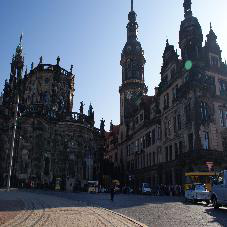

In [38]:
path = '/share/jproject/fg538/r-006-gpu-4/data/train_resized/12220/09ab2136a66a872a.jpg'
img = Image.open(path)
img

In [39]:
img.save('preview/test.jpg')

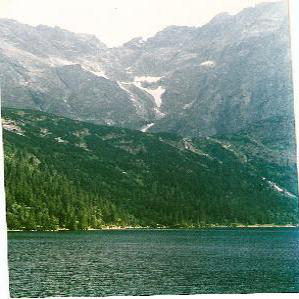

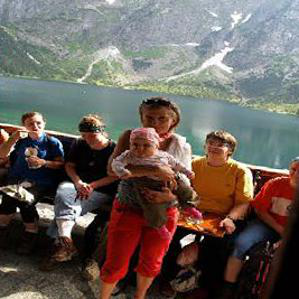

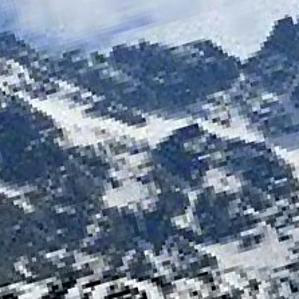

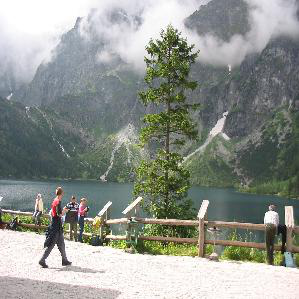

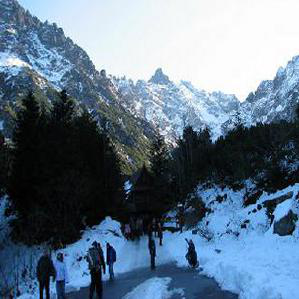

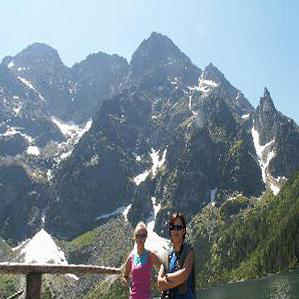

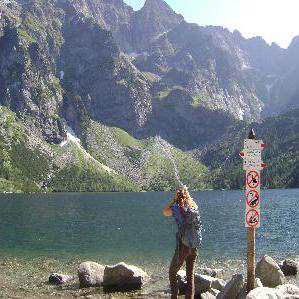

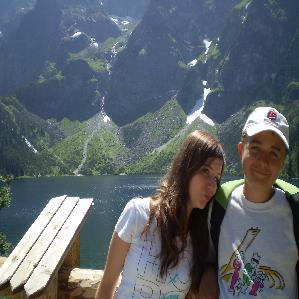

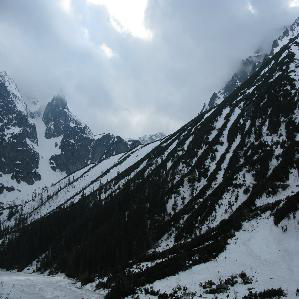

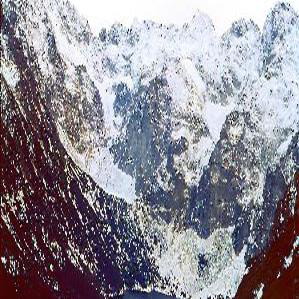

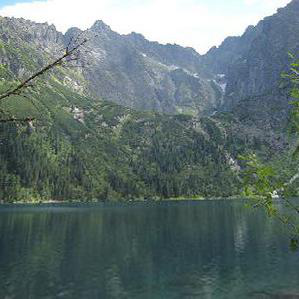

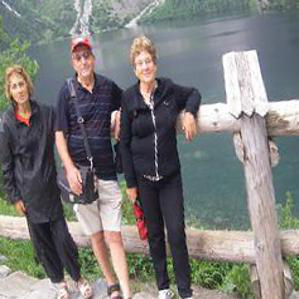

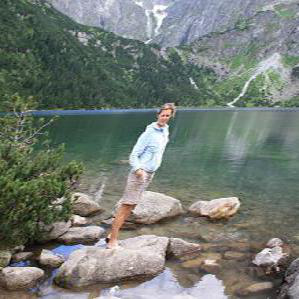

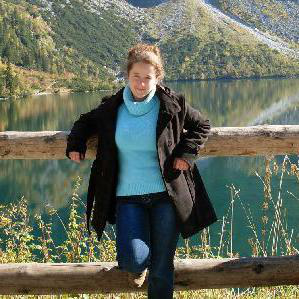

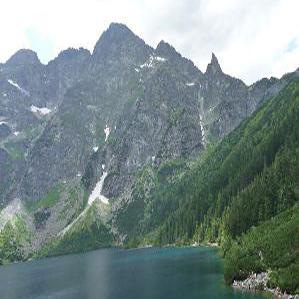

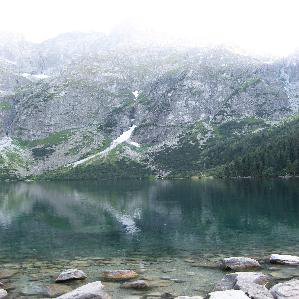

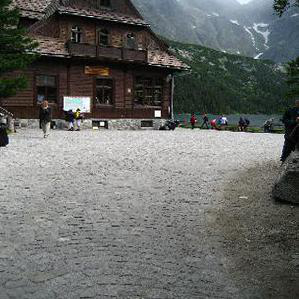

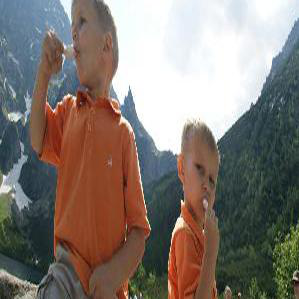

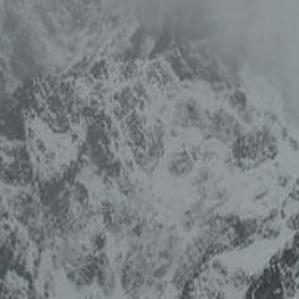

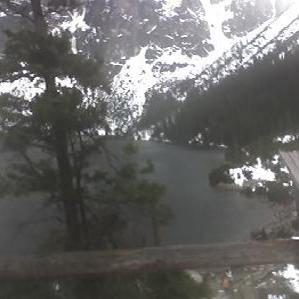

In [3]:
for file in os.listdir('/share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/')[:20]:
    if file.endswith('jpg'):
        img = Image.open('/share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/{}'.format(file))
        display(img)

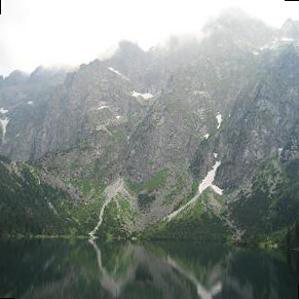

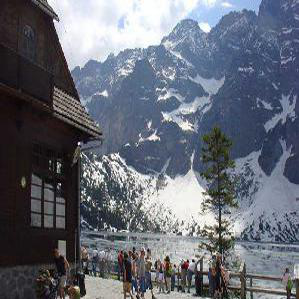

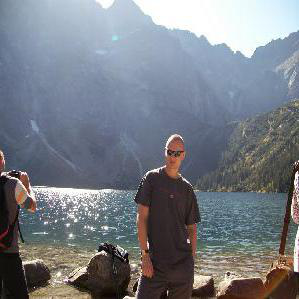

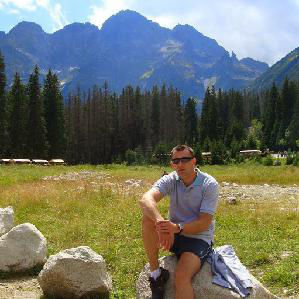

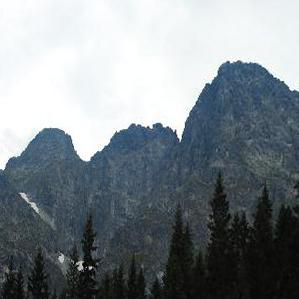

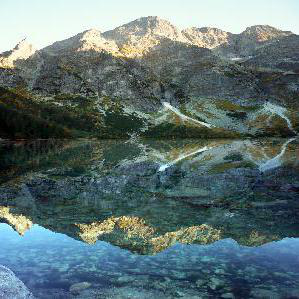

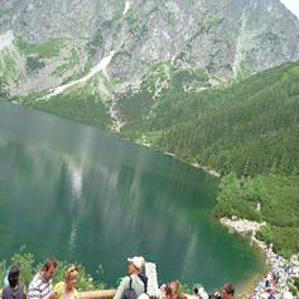

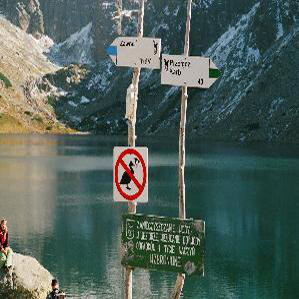

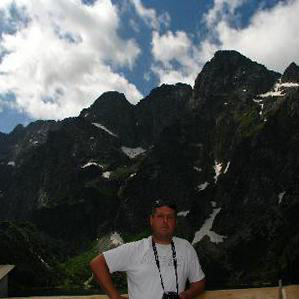

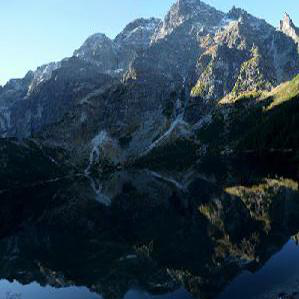

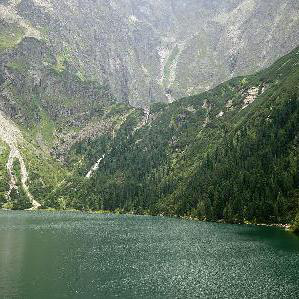

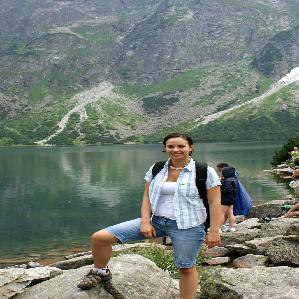

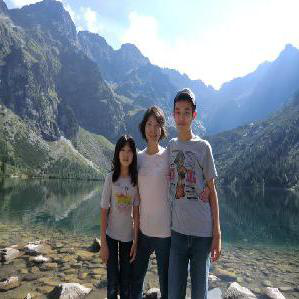

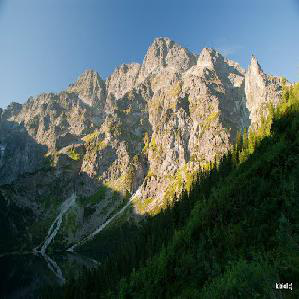

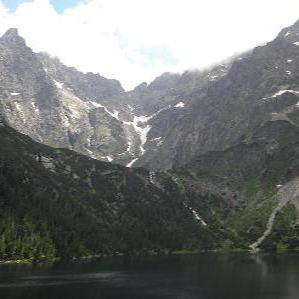

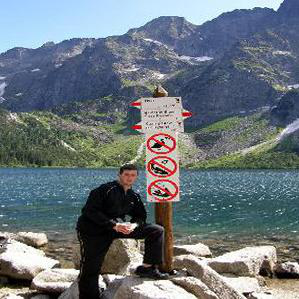

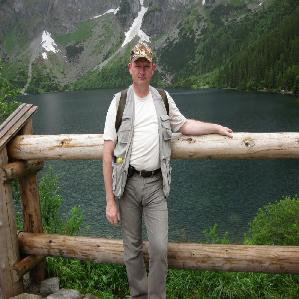

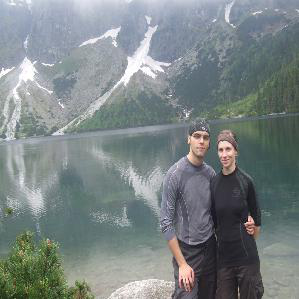

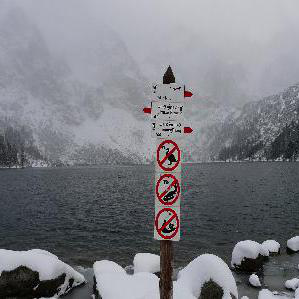

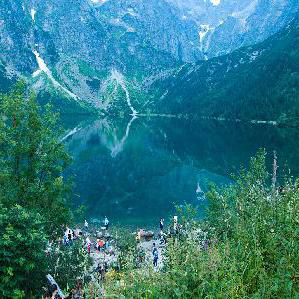

In [4]:
for file in os.listdir('/share/jproject/fg538/r-006-gpu-4/data/keras_data/val_dir/2870/')[:20]:
    if file.endswith('jpg'):
        img = Image.open('/share/jproject/fg538/r-006-gpu-4/data/keras_data/val_dir/2870/{}'.format(file))
        display(img)

In [3]:
def flip(sample_size, source_directory, output_directory):
    p = Augmentor.Pipeline(source_directory=source_directory, output_directory=output_directory)
    p.flip_left_right(probability=1)
    p.sample(sample_size)
    

def augment(sample_size, source_directory, output_directory, n):
    for i in range(n):
        p = Augmentor.Pipeline(source_directory=source_directory, output_directory=output_directory)
        p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
        p.sample(sample_size)

        p = Augmentor.Pipeline(source_directory=source_directory, output_directory=output_directory)
        p.shear(probability=1, max_shear_left=20, max_shear_right=20)
        p.sample(sample_size)

        p = Augmentor.Pipeline(source_directory=source_directory, output_directory=output_directory)
        p.skew(probability=1, magnitude=.2)
        p.sample(sample_size)

In [4]:
path = '/share/jproject/fg538/r-006-gpu-4/data'

for folder in os.listdir('{}/train_dir/'.format(path)):
    source_directory = '{}/train_dir/{}/'.format(path,folder)
    output_directory = '{}/keras_data/train_dir/{}/'.format(path, folder)
    
    file_count  = len(os.listdir(source_directory))
    sample_size = 10000-file_count
    
    if file_count>=2000 and file_count<=9000:
        augment(sample_size//4, source_directory, output_directory, 1)
        flip(sample_size//4, source_directory, output_directory)
    if file_count<2000:
        temp_file_count = file_count
        flip(file_count, source_directory, output_directory)
        temp_file_count *= 2
        while(10000-temp_file_count >= 0):
            if (10000-temp_file_count)//3 <= file_count:
                augment((10000 - temp_file_count)//3, source_directory, output_directory,1)
                break
            else:
                augment(file_count, source_directory, output_directory,1)
                temp_file_count += (file_count*3)
        #augment(file_count, source_directory, output_directory, (10000-2*file_count)//(3*file_count))

Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 7198 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2743/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FA30B8>: 100%|██████████| 700/700 [00:01<00:00, 413.73 Samples/s]
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 7198 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2743/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910806C320>: 100%|██████████| 700/700 [00:01<00:00, 428.89 Samples/s]
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 7198 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2743/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91043C0588>: 100%|██████████| 700/700 [00:01<00:00, 401.77 Samples/s]
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 7198 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2743/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910428BE80>: 100%|██████████| 700/700 [00:01<00:00, 529.98 Samples/s]
Executing Pipeline:   0%|          | 0/1979 [00:00<?, ? Samples/s]

Initialised with 2083 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9029/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073EF860>: 100%|██████████| 1979/1979 [00:04<00:00, 428.70 Samples/s]
Executing Pipeline:   0%|          | 0/1979 [00:00<?, ? Samples/s]

Initialised with 2083 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9029/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910740A4A8>: 100%|██████████| 1979/1979 [00:04<00:00, 425.53 Samples/s]
Executing Pipeline:   0%|          | 0/1979 [00:00<?, ? Samples/s]

Initialised with 2083 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9029/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042E95F8>: 100%|██████████| 1979/1979 [00:04<00:00, 417.06 Samples/s]
Executing Pipeline:   0%|          | 0/1979 [00:00<?, ? Samples/s]

Initialised with 2083 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9029/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910442ED68>: 100%|██████████| 1979/1979 [00:03<00:00, 550.79 Samples/s]
Executing Pipeline:   0%|          | 0/1375 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E286A0>: 100%|██████████| 1375/1375 [00:02<00:00, 522.12 Samples/s]
Executing Pipeline:   0%|          | 0/1375 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073FDD30>: 100%|██████████| 1375/1375 [00:03<00:00, 420.67 Samples/s]
Executing Pipeline:   0%|          | 0/1375 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FA8B70>: 100%|██████████| 1375/1375 [00:03<00:00, 412.51 Samples/s]
Executing Pipeline:   0%|          | 0/1375 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910805FB70>: 100%|██████████| 1375/1375 [00:03<00:00, 415.95 Samples/s]
Executing Pipeline:   0%|          | 0/1041 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DB3390>: 100%|██████████| 1041/1041 [00:02<00:00, 417.35 Samples/s]
Executing Pipeline:   0%|          | 0/1041 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104258FD0>: 100%|██████████| 1041/1041 [00:02<00:00, 415.29 Samples/s]
Executing Pipeline:   0%|          | 0/1041 [00:00<?, ? Samples/s]

Initialised with 1375 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5955/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910430D668>: 100%|██████████| 1041/1041 [00:02<00:00, 422.15 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080A37F0>: 100%|██████████| 1084/1084 [00:01<00:00, 549.13 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042D4860>: 100%|██████████| 1084/1084 [00:02<00:00, 406.71 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DAD390>: 100%|██████████| 1084/1084 [00:02<00:00, 422.28 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042A8BE0>: 100%|██████████| 1084/1084 [00:02<00:00, 412.06 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91044362B0>: 100%|██████████| 1084/1084 [00:02<00:00, 423.16 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042816A0>: 100%|██████████| 1084/1084 [00:02<00:00, 418.04 Samples/s]
Executing Pipeline:   0%|          | 0/1084 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910426F7B8>: 100%|██████████| 1084/1084 [00:02<00:00, 411.86 Samples/s]
Executing Pipeline:   0%|          | 0/442 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080C62B0>: 100%|██████████| 442/442 [00:01<00:00, 410.40 Samples/s]
Executing Pipeline:   0%|          | 0/442 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91043420F0>: 100%|██████████| 442/442 [00:01<00:00, 436.66 Samples/s]
Executing Pipeline:   0%|          | 0/442 [00:00<?, ? Samples/s]

Initialised with 1084 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5460/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E1B748>: 100%|██████████| 442/442 [00:01<00:00, 431.55 Samples/s]
Executing Pipeline:   0%|          | 0/1865 [00:00<?, ? Samples/s]

Initialised with 2537 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/428/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107323390>: 100%|██████████| 1865/1865 [00:04<00:00, 415.54 Samples/s]
Executing Pipeline:   0%|          | 0/1865 [00:00<?, ? Samples/s]

Initialised with 2537 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/428/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D68E80>: 100%|██████████| 1865/1865 [00:04<00:00, 426.08 Samples/s]
Executing Pipeline:   0%|          | 0/1865 [00:00<?, ? Samples/s]

Initialised with 2537 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/428/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104284FD0>: 100%|██████████| 1865/1865 [00:04<00:00, 415.89 Samples/s]
Executing Pipeline:   0%|          | 0/1865 [00:00<?, ? Samples/s]

Initialised with 2537 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/428/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D90048>: 100%|██████████| 1865/1865 [00:03<00:00, 541.83 Samples/s]
Executing Pipeline:   0%|          | 0/1516 [00:00<?, ? Samples/s]

Initialised with 3936 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2949/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E9A4A8>: 100%|██████████| 1516/1516 [00:03<00:00, 420.57 Samples/s]
Executing Pipeline:   0%|          | 0/1516 [00:00<?, ? Samples/s]

Initialised with 3936 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2949/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910425F5C0>: 100%|██████████| 1516/1516 [00:03<00:00, 415.25 Samples/s]
Executing Pipeline:   0%|          | 0/1516 [00:00<?, ? Samples/s]

Initialised with 3936 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2949/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910434C320>: 100%|██████████| 1516/1516 [00:03<00:00, 420.87 Samples/s]
Executing Pipeline:   0%|          | 0/1516 [00:00<?, ? Samples/s]

Initialised with 3936 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2949/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910444A208>: 100%|██████████| 1516/1516 [00:02<00:00, 573.00 Samples/s]
Executing Pipeline:   0%|          | 0/1404 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107324A58>: 100%|██████████| 1404/1404 [00:02<00:00, 561.73 Samples/s]
Executing Pipeline:   0%|          | 0/1404 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910805F710>: 100%|██████████| 1404/1404 [00:03<00:00, 401.77 Samples/s]
Executing Pipeline:   0%|          | 0/1404 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073E7710>: 100%|██████████| 1404/1404 [00:03<00:00, 432.10 Samples/s]
Executing Pipeline:   0%|          | 0/1404 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FEF2B0>: 100%|██████████| 1404/1404 [00:03<00:00, 413.31 Samples/s]
Executing Pipeline:   0%|          | 0/993 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108006D68>: 100%|██████████| 993/993 [00:02<00:00, 412.73 Samples/s]
Executing Pipeline:   0%|          | 0/993 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073DAA90>: 100%|██████████| 993/993 [00:02<00:00, 427.76 Samples/s]
Executing Pipeline:   0%|          | 0/993 [00:00<?, ? Samples/s]

Initialised with 1404 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8169/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E24B70>: 100%|██████████| 993/993 [00:02<00:00, 415.65 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104263828>: 100%|██████████| 912/912 [00:01<00:00, 569.05 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108063710>: 100%|██████████| 912/912 [00:02<00:00, 409.23 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104330668>: 100%|██████████| 912/912 [00:02<00:00, 430.65 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EA6240>: 100%|██████████| 912/912 [00:02<00:00, 428.93 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91074141D0>: 100%|██████████| 912/912 [00:02<00:00, 412.22 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910747C5F8>: 100%|██████████| 912/912 [00:02<00:00, 436.40 Samples/s]
Executing Pipeline:   0%|          | 0/912 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910741BC50>: 100%|██████████| 912/912 [00:02<00:00, 429.15 Samples/s]
Executing Pipeline:   0%|          | 0/901 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104299F60>: 100%|██████████| 901/901 [00:02<00:00, 414.65 Samples/s]
Executing Pipeline:   0%|          | 0/901 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910806C0B8>: 100%|██████████| 901/901 [00:02<00:00, 413.77 Samples/s]
Executing Pipeline:   0%|          | 0/901 [00:00<?, ? Samples/s]

Initialised with 912 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3426/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104305588>: 100%|██████████| 901/901 [00:02<00:00, 425.39 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DC8240>: 100%|██████████| 1142/1142 [00:02<00:00, 548.84 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E330F0>: 100%|██████████| 1142/1142 [00:02<00:00, 401.60 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91074879E8>: 100%|██████████| 1142/1142 [00:02<00:00, 423.75 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CF5F60>: 100%|██████████| 1142/1142 [00:02<00:00, 406.74 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080060F0>: 100%|██████████| 1142/1142 [00:02<00:00, 412.65 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910448AE80>: 100%|██████████| 1142/1142 [00:02<00:00, 422.18 Samples/s]
Executing Pipeline:   0%|          | 0/1142 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D7E278>: 100%|██████████| 1142/1142 [00:02<00:00, 393.03 Samples/s]
Executing Pipeline:   0%|          | 0/288 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EB72E8>: 100%|██████████| 288/288 [00:00<00:00, 389.24 Samples/s]
Executing Pipeline:   0%|          | 0/288 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042791D0>: 100%|██████████| 288/288 [00:00<00:00, 434.69 Samples/s]
Executing Pipeline:   0%|          | 0/288 [00:00<?, ? Samples/s]

Initialised with 1142 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8274/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91044846D8>: 100%|██████████| 288/288 [00:00<00:00, 442.49 Samples/s]
Executing Pipeline:   0%|          | 0/1428 [00:00<?, ? Samples/s]

Initialised with 4287 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4987/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104341D30>: 100%|██████████| 1428/1428 [00:03<00:00, 406.33 Samples/s]
Executing Pipeline:   0%|          | 0/1428 [00:00<?, ? Samples/s]

Initialised with 4287 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4987/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910429BDD8>: 100%|██████████| 1428/1428 [00:03<00:00, 432.08 Samples/s]
Executing Pipeline:   0%|          | 0/1428 [00:00<?, ? Samples/s]

Initialised with 4287 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4987/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910428AFD0>: 100%|██████████| 1428/1428 [00:03<00:00, 424.34 Samples/s]
Executing Pipeline:   0%|          | 0/1428 [00:00<?, ? Samples/s]

Initialised with 4287 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4987/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF6F28>: 100%|██████████| 1428/1428 [00:02<00:00, 546.25 Samples/s]
Executing Pipeline:   0%|          | 0/1910 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910426A6D8>: 100%|██████████| 1910/1910 [00:03<00:00, 566.33 Samples/s]
Executing Pipeline:   0%|          | 0/1910 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E27278>: 100%|██████████| 1910/1910 [00:04<00:00, 420.10 Samples/s]
Executing Pipeline:   0%|          | 0/1910 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104306B38>: 100%|██████████| 1910/1910 [00:04<00:00, 440.03 Samples/s]
Executing Pipeline:   0%|          | 0/1910 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104425240>: 100%|██████████| 1910/1910 [00:04<00:00, 422.02 Samples/s]
Executing Pipeline:   0%|          | 0/150 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F0FAC8>: 100%|██████████| 150/150 [00:00<00:00, 418.85 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910742A5C0>:   3%|▎         | 5/150 [00:00<00:27,  5.32 Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5CCF8>: 100%|██████████| 150/150 [00:00<00:00, 489.25 Samples/s]
Executing Pipeline:   0%|          | 0/150 [00:00<?, ? Samples/s]

Initialised with 1910 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10932/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F3D2B0>: 100%|██████████| 150/150 [00:00<00:00, 449.87 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910425A1D0>: 100%|██████████| 1109/1109 [00:01<00:00, 557.88 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910735A518>: 100%|██████████| 1109/1109 [00:02<00:00, 423.68 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910427BCF8>: 100%|██████████| 1109/1109 [00:02<00:00, 438.87 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E30BA8>: 100%|██████████| 1109/1109 [00:02<00:00, 427.04 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DCC748>: 100%|██████████| 1109/1109 [00:02<00:00, 430.78 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104278668>: 100%|██████████| 1109/1109 [00:02<00:00, 439.69 Samples/s]
Executing Pipeline:   0%|          | 0/1109 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073EDA90>: 100%|██████████| 1109/1109 [00:02<00:00, 413.67 Samples/s]
Executing Pipeline:   0%|          | 0/376 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EDC6D8>: 100%|██████████| 376/376 [00:00<00:00, 419.35 Samples/s]
Executing Pipeline:   0%|          | 0/376 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910440F748>: 100%|██████████| 376/376 [00:00<00:00, 473.35 Samples/s]
Executing Pipeline:   0%|          | 0/376 [00:00<?, ? Samples/s]

Initialised with 1109 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3130/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D61518>: 100%|██████████| 376/376 [00:00<00:00, 438.71 Samples/s]
Executing Pipeline:   0%|          | 0/655 [00:00<?, ? Samples/s]

Initialised with 7378 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6696/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107421470>: 100%|██████████| 655/655 [00:01<00:00, 414.76 Samples/s]
Executing Pipeline:   0%|          | 0/655 [00:00<?, ? Samples/s]

Initialised with 7378 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6696/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8400>: 100%|██████████| 655/655 [00:01<00:00, 401.75 Samples/s]
Executing Pipeline:   0%|          | 0/655 [00:00<?, ? Samples/s]

Initialised with 7378 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6696/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042FD6D8>: 100%|██████████| 655/655 [00:01<00:00, 413.20 Samples/s]
Executing Pipeline:   0%|          | 0/655 [00:00<?, ? Samples/s]

Initialised with 7378 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6696/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D70320>: 100%|██████████| 655/655 [00:01<00:00, 591.01 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CAE198>:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE82B0>: 100%|██████████| 890/890 [00:01<00:00, 494.24 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E7F668>: 100%|██████████| 890/890 [00:02<00:00, 419.52 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073EDF28>: 100%|██████████| 890/890 [00:01<00:00, 448.94 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107377A90>: 100%|██████████| 890/890 [00:02<00:00, 429.41 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107315518>: 100%|██████████| 890/890 [00:02<00:00, 429.62 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910741F4A8>: 100%|██████████| 890/890 [00:02<00:00, 442.34 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073FD8D0>: 100%|██████████| 890/890 [00:02<00:00, 426.56 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E07860>: 100%|██████████| 890/890 [00:02<00:00, 436.70 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104414518>: 100%|██████████| 890/890 [00:02<00:00, 440.81 Samples/s]
Executing Pipeline:   0%|          | 0/890 [00:00<?, ? Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107406630>: 100%|██████████| 890/890 [00:02<00:00, 419.67 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DFA860>: 100%|██████████| 70/70 [00:00<00:00, 410.19 Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8B38>: 100%|██████████| 70/70 [00:00<00:00, 453.27 Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107329B38>: 100%|██████████| 70/70 [00:00<00:00, 479.66 Samples/s]

Initialised with 890 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1310/.


Executing Pipeline:   0%|          | 0/1599 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DBED68>: 100%|██████████| 1599/1599 [00:02<00:00, 555.90 Samples/s]
Executing Pipeline:   0%|          | 0/1599 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080D4668>: 100%|██████████| 1599/1599 [00:03<00:00, 409.06 Samples/s]
Executing Pipeline:   0%|          | 0/1599 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FC1828>: 100%|██████████| 1599/1599 [00:03<00:00, 442.61 Samples/s]
Executing Pipeline:   0%|          | 0/1599 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8B00>: 100%|██████████| 1599/1599 [00:03<00:00, 422.11 Samples/s]
Executing Pipeline:   0%|          | 0/668 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E07E80>: 100%|██████████| 668/668 [00:01<00:00, 429.03 Samples/s]
Executing Pipeline:   0%|          | 0/668 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108084CF8>: 100%|██████████| 668/668 [00:01<00:00, 431.82 Samples/s]
Executing Pipeline:   0%|          | 0/668 [00:00<?, ? Samples/s]

Initialised with 1599 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2044/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E175F8>: 100%|██████████| 668/668 [00:01<00:00, 404.52 Samples/s]
Executing Pipeline:   0%|          | 0/1368 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104484518>: 100%|██████████| 1368/1368 [00:02<00:00, 592.36 Samples/s]
Executing Pipeline:   0%|          | 0/1368 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D124A8>: 100%|██████████| 1368/1368 [00:03<00:00, 411.99 Samples/s]
Executing Pipeline:   0%|          | 0/1368 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910737B860>: 100%|██████████| 1368/1368 [00:03<00:00, 431.15 Samples/s]
Executing Pipeline:   0%|          | 0/1368 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F32710>: 100%|██████████| 1368/1368 [00:03<00:00, 433.64 Samples/s]
Executing Pipeline:   0%|          | 0/1053 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910737DF98>: 100%|██████████| 1053/1053 [00:02<00:00, 407.93 Samples/s]
Executing Pipeline:   0%|          | 0/1053 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE8EB8>: 100%|██████████| 1053/1053 [00:02<00:00, 435.81 Samples/s]
Executing Pipeline:   0%|          | 0/1053 [00:00<?, ? Samples/s]

Initialised with 1368 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2449/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D207F0>: 100%|██████████| 1053/1053 [00:02<00:00, 446.33 Samples/s]
Executing Pipeline:   0%|          | 0/1460 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E282B0>: 100%|██████████| 1460/1460 [00:02<00:00, 560.65 Samples/s]
Executing Pipeline:   0%|          | 0/1460 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CFE3C8>: 100%|██████████| 1460/1460 [00:03<00:00, 421.97 Samples/s]
Executing Pipeline:   0%|          | 0/1460 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE30F0>: 100%|██████████| 1460/1460 [00:03<00:00, 431.14 Samples/s]
Executing Pipeline:   0%|          | 0/1460 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CDC320>: 100%|██████████| 1460/1460 [00:03<00:00, 426.24 Samples/s]
Executing Pipeline:   0%|          | 0/900 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AEA4A8>: 100%|██████████| 900/900 [00:02<00:00, 405.07 Samples/s]
Executing Pipeline:   0%|          | 0/900 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CDCBE0>: 100%|██████████| 900/900 [00:02<00:00, 431.88 Samples/s]
Executing Pipeline:   0%|          | 0/900 [00:00<?, ? Samples/s]

Initialised with 1460 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2870/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F88BA8>: 100%|██████████| 900/900 [00:02<00:00, 435.36 Samples/s]
Executing Pipeline:   0%|          | 0/1282 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DC6828>: 100%|██████████| 1282/1282 [00:02<00:00, 568.06 Samples/s]
Executing Pipeline:   0%|          | 0/1282 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104472B38>: 100%|██████████| 1282/1282 [00:03<00:00, 419.86 Samples/s]
Executing Pipeline:   0%|          | 0/1282 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910733C390>: 100%|██████████| 1282/1282 [00:03<00:00, 420.92 Samples/s]
Executing Pipeline:   0%|          | 0/1282 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF8780>: 100%|██████████| 1282/1282 [00:02<00:00, 434.16 Samples/s]
Executing Pipeline:   0%|          | 0/1196 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042CCB00>: 100%|██████████| 1196/1196 [00:02<00:00, 427.56 Samples/s]
Executing Pipeline:   0%|          | 0/1196 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073F6400>: 100%|██████████| 1196/1196 [00:02<00:00, 425.15 Samples/s]
Executing Pipeline:   0%|          | 0/1196 [00:00<?, ? Samples/s]

Initialised with 1282 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/233/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EC9828>: 100%|██████████| 1196/1196 [00:02<00:00, 428.98 Samples/s]
Executing Pipeline:   0%|          | 0/1814 [00:00<?, ? Samples/s]

Initialised with 2742 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2338/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DB9400>: 100%|██████████| 1814/1814 [00:04<00:00, 413.34 Samples/s]
Executing Pipeline:   0%|          | 0/1814 [00:00<?, ? Samples/s]

Initialised with 2742 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2338/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E3E320>: 100%|██████████| 1814/1814 [00:04<00:00, 440.64 Samples/s]
Executing Pipeline:   0%|          | 0/1814 [00:00<?, ? Samples/s]

Initialised with 2742 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2338/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E22710>: 100%|██████████| 1814/1814 [00:04<00:00, 425.85 Samples/s]
Executing Pipeline:   0%|          | 0/1814 [00:00<?, ? Samples/s]

Initialised with 2742 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2338/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073330B8>: 100%|██████████| 1814/1814 [00:03<00:00, 555.03 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DA24E0>: 100%|██████████| 1213/1213 [00:02<00:00, 566.97 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E49048>: 100%|██████████| 1213/1213 [00:02<00:00, 424.01 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D1A5C0>: 100%|██████████| 1213/1213 [00:02<00:00, 438.12 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107327550>: 100%|██████████| 1213/1213 [00:02<00:00, 431.52 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FCDE48>: 100%|██████████| 1213/1213 [00:02<00:00, 406.90 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C09FD0>: 100%|██████████| 1213/1213 [00:02<00:00, 434.79 Samples/s]
Executing Pipeline:   0%|          | 0/1213 [00:00<?, ? Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073E2048>: 100%|██████████| 1213/1213 [00:02<00:00, 413.94 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E81358>:  67%|██████▋   | 66/98 [00:00<00:04,  7.07 Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AFAB70>: 100%|██████████| 98/98 [00:00<00:00, 413.77 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D75A20>:  99%|█████████▉| 97/98 [00:00<00:00,  7.82 Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D75A20>: 100%|██████████| 98/98 [00:00<00:00, 462.67 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ADA0B8>:  77%|███████▋  | 75/98 [00:00<00:03,  6.95 Samples/s]

Initialised with 1213 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1602/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910445A550>: 100%|██████████| 98/98 [00:00<00:00, 435.18 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910731FF98>: 100%|██████████| 953/953 [00:01<00:00, 555.78 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F329B0>: 100%|██████████| 953/953 [00:02<00:00, 427.36 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F24FD0>: 100%|██████████| 953/953 [00:02<00:00, 432.41 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FE14E0>: 100%|██████████| 953/953 [00:02<00:00, 440.69 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E71860>: 100%|██████████| 953/953 [00:02<00:00, 426.49 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ACEDA0>: 100%|██████████| 953/953 [00:02<00:00, 430.69 Samples/s]
Executing Pipeline:   0%|          | 0/953 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073719E8>: 100%|██████████| 953/953 [00:02<00:00, 430.69 Samples/s]
Executing Pipeline:   0%|          | 0/792 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BB3630>: 100%|██████████| 792/792 [00:01<00:00, 427.74 Samples/s]
Executing Pipeline:   0%|          | 0/792 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C119B0>: 100%|██████████| 792/792 [00:01<00:00, 427.21 Samples/s]
Executing Pipeline:   0%|          | 0/792 [00:00<?, ? Samples/s]

Initialised with 953 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7764/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E00390>: 100%|██████████| 792/792 [00:01<00:00, 440.15 Samples/s]
Executing Pipeline:   0%|          | 0/1092 [00:00<?, ? Samples/s]

Initialised with 5631 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10900/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DA17B8>: 100%|██████████| 1092/1092 [00:02<00:00, 398.51 Samples/s]
Executing Pipeline:   0%|          | 0/1092 [00:00<?, ? Samples/s]

Initialised with 5631 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10900/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104470DD8>: 100%|██████████| 1092/1092 [00:02<00:00, 427.64 Samples/s]
Executing Pipeline:   0%|          | 0/1092 [00:00<?, ? Samples/s]

Initialised with 5631 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10900/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DA0F98>: 100%|██████████| 1092/1092 [00:02<00:00, 411.04 Samples/s]
Executing Pipeline:   0%|          | 0/1092 [00:00<?, ? Samples/s]

Initialised with 5631 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10900/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECE550>: 100%|██████████| 1092/1092 [00:01<00:00, 569.65 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D6C630>: 100%|██████████| 971/971 [00:01<00:00, 583.52 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910738AE48>: 100%|██████████| 971/971 [00:02<00:00, 430.91 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B8DEB8>: 100%|██████████| 971/971 [00:02<00:00, 436.53 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E94780>: 100%|██████████| 971/971 [00:02<00:00, 427.39 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EE2908>: 100%|██████████| 971/971 [00:02<00:00, 430.52 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FB4D30>: 100%|██████████| 971/971 [00:02<00:00, 73.02 Samples/s]
Executing Pipeline:   0%|          | 0/971 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080CF358>: 100%|██████████| 971/971 [00:02<00:00, 420.17 Samples/s]
Executing Pipeline:   0%|          | 0/744 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080676D8>: 100%|██████████| 744/744 [00:01<00:00, 437.45 Samples/s]
Executing Pipeline:   0%|          | 0/744 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F05CC0>: 100%|██████████| 744/744 [00:01<00:00, 441.45 Samples/s]
Executing Pipeline:   0%|          | 0/744 [00:00<?, ? Samples/s]

Initialised with 971 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9999/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE9D30>: 100%|██████████| 744/744 [00:01<00:00, 437.34 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108088A20>: 100%|██████████| 1138/1138 [00:02<00:00, 566.13 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BF0860>: 100%|██████████| 1138/1138 [00:02<00:00, 429.03 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C2CC18>: 100%|██████████| 1138/1138 [00:02<00:00, 425.17 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE9E48>: 100%|██████████| 1138/1138 [00:02<00:00, 438.27 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910806B160>: 100%|██████████| 1138/1138 [00:02<00:00, 434.21 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EE3C88>: 100%|██████████| 1138/1138 [00:02<00:00, 421.19 Samples/s]
Executing Pipeline:   0%|          | 0/1138 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C4F5F8>: 100%|██████████| 1138/1138 [00:02<00:00, 423.96 Samples/s]
Executing Pipeline:   0%|          | 0/298 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910447E9E8>: 100%|██████████| 298/298 [00:00<00:00, 413.79 Samples/s]
Executing Pipeline:   0%|          | 0/298 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042A0470>: 100%|██████████| 298/298 [00:00<00:00, 446.03 Samples/s]
Executing Pipeline:   0%|          | 0/298 [00:00<?, ? Samples/s]

Initialised with 1138 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13873/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AD1588>: 100%|██████████| 298/298 [00:00<00:00, 438.42 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B71208>: 100%|██████████| 1133/1133 [00:01<00:00, 577.19 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C49940>: 100%|██████████| 1133/1133 [00:02<00:00, 429.33 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AC1278>: 100%|██████████| 1133/1133 [00:02<00:00, 421.66 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C0B828>: 100%|██████████| 1133/1133 [00:02<00:00, 435.99 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910444F6D8>: 100%|██████████| 1133/1133 [00:02<00:00, 416.84 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107434F28>: 100%|██████████| 1133/1133 [00:02<00:00, 437.07 Samples/s]
Executing Pipeline:   0%|          | 0/1133 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D96A58>: 100%|██████████| 1133/1133 [00:02<00:00, 434.36 Samples/s]
Executing Pipeline:   0%|          | 0/312 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B59C18>: 100%|██████████| 312/312 [00:00<00:00, 369.80 Samples/s]
Executing Pipeline:   0%|          | 0/312 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DDE4E0>: 100%|██████████| 312/312 [00:00<00:00, 449.79 Samples/s]
Executing Pipeline:   0%|          | 0/312 [00:00<?, ? Samples/s]

Initialised with 1133 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E10908>: 100%|██████████| 312/312 [00:00<00:00, 436.46 Samples/s]
Executing Pipeline:   0%|          | 0/1349 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ED76A0>: 100%|██████████| 1349/1349 [00:02<00:00, 573.84 Samples/s]
Executing Pipeline:   0%|          | 0/1349 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C06F60>: 100%|██████████| 1349/1349 [00:03<00:00, 416.28 Samples/s]
Executing Pipeline:   0%|          | 0/1349 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E94588>: 100%|██████████| 1349/1349 [00:03<00:00, 440.92 Samples/s]
Executing Pipeline:   0%|          | 0/1349 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E6C780>: 100%|██████████| 1349/1349 [00:03<00:00, 428.77 Samples/s]
Executing Pipeline:   0%|          | 0/1085 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042C0FD0>: 100%|██████████| 1085/1085 [00:02<00:00, 433.79 Samples/s]
Executing Pipeline:   0%|          | 0/1085 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BEA320>: 100%|██████████| 1085/1085 [00:02<00:00, 429.51 Samples/s]
Executing Pipeline:   0%|          | 0/1085 [00:00<?, ? Samples/s]

Initialised with 1349 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1847/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91044556A0>: 100%|██████████| 1085/1085 [00:02<00:00, 422.28 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104297A20>: 100%|██████████| 931/931 [00:01<00:00, 570.03 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104455CF8>: 100%|██████████| 931/931 [00:02<00:00, 413.62 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107438860>: 100%|██████████| 931/931 [00:02<00:00, 424.45 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AA80B8>: 100%|██████████| 931/931 [00:02<00:00, 425.58 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BF7198>: 100%|██████████| 931/931 [00:02<00:00, 415.99 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EF8BA8>: 100%|██████████| 931/931 [00:02<00:00, 437.10 Samples/s]
Executing Pipeline:   0%|          | 0/931 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104455C18>: 100%|██████████| 931/931 [00:02<00:00, 430.65 Samples/s]
Executing Pipeline:   0%|          | 0/850 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C522B0>: 100%|██████████| 850/850 [00:02<00:00, 412.41 Samples/s]
Executing Pipeline:   0%|          | 0/850 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080AD6A0>: 100%|██████████| 850/850 [00:01<00:00, 434.34 Samples/s]
Executing Pipeline:   0%|          | 0/850 [00:00<?, ? Samples/s]

Initialised with 931 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7420/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C13780>: 100%|██████████| 850/850 [00:01<00:00, 431.86 Samples/s]
Executing Pipeline:   0%|          | 0/701 [00:00<?, ? Samples/s]

Initialised with 7195 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4352/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91074237F0>: 100%|██████████| 701/701 [00:01<00:00, 388.13 Samples/s]
Executing Pipeline:   0%|          | 0/701 [00:00<?, ? Samples/s]

Initialised with 7195 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4352/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B71E80>: 100%|██████████| 701/701 [00:01<00:00, 433.02 Samples/s]
Executing Pipeline:   0%|          | 0/701 [00:00<?, ? Samples/s]

Initialised with 7195 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4352/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B24EB8>: 100%|██████████| 701/701 [00:01<00:00, 398.44 Samples/s]
Executing Pipeline:   0%|          | 0/701 [00:00<?, ? Samples/s]

Initialised with 7195 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4352/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C97780>: 100%|██████████| 701/701 [00:01<00:00, 23.25 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D1C2B0>: 100%|██████████| 1249/1249 [00:02<00:00, 544.24 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B5CC50>: 100%|██████████| 1249/1249 [00:02<00:00, 423.29 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE9550>: 100%|██████████| 1249/1249 [00:02<00:00, 436.35 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B609E8>: 100%|██████████| 1249/1249 [00:02<00:00, 417.26 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E92390>: 100%|██████████| 1249/1249 [00:02<00:00, 424.35 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D57DA0>: 100%|██████████| 1249/1249 [00:02<00:00, 426.09 Samples/s]
Executing Pipeline:   0%|          | 0/1249 [00:00<?, ? Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBCA20>: 100%|██████████| 1249/1249 [00:02<00:00, 437.00 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF0748>: 100%|██████████| 2/2 [00:00<00:00, 70.45 Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECF390>: 100%|██████████| 2/2 [00:00<00:00, 78.51 Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF0320>: 100%|██████████| 2/2 [00:00<00:00, 79.51 Samples/s]

Initialised with 1249 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1946/.


Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D4B860>: 100%|██████████| 986/986 [00:01<00:00, 542.15 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B60080>: 100%|██████████| 986/986 [00:02<00:00, 426.58 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104453AC8>: 100%|██████████| 986/986 [00:02<00:00, 438.18 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E92080>: 100%|██████████| 986/986 [00:02<00:00, 421.47 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107368E48>: 100%|██████████| 986/986 [00:02<00:00, 433.34 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B6D6A0>: 100%|██████████| 986/986 [00:02<00:00, 442.74 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B93588>: 100%|██████████| 986/986 [00:02<00:00, 421.31 Samples/s]
Executing Pipeline:   0%|          | 0/704 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EF1FD0>: 100%|██████████| 704/704 [00:01<00:00, 445.74 Samples/s]
Executing Pipeline:   0%|          | 0/704 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D44C88>: 100%|██████████| 704/704 [00:01<00:00, 452.13 Samples/s]
Executing Pipeline:   0%|          | 0/704 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/960/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104453BE0>: 100%|██████████| 704/704 [00:01<00:00, 440.07 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E5A710>: 100%|██████████| 954/954 [00:01<00:00, 589.46 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C7F828>: 100%|██████████| 954/954 [00:02<00:00, 433.77 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91074434A8>: 100%|██████████| 954/954 [00:02<00:00, 442.04 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B59FD0>: 100%|██████████| 954/954 [00:02<00:00, 433.16 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B45E48>: 100%|██████████| 954/954 [00:02<00:00, 429.58 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910445F4E0>: 100%|██████████| 954/954 [00:02<00:00, 422.33 Samples/s]
Executing Pipeline:   0%|          | 0/954 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B7F7F0>: 100%|██████████| 954/954 [00:02<00:00, 437.22 Samples/s]
Executing Pipeline:   0%|          | 0/789 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C6CEF0>: 100%|██████████| 789/789 [00:01<00:00, 435.06 Samples/s]
Executing Pipeline:   0%|          | 0/789 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DEC208>: 100%|██████████| 789/789 [00:01<00:00, 450.04 Samples/s]
Executing Pipeline:   0%|          | 0/789 [00:00<?, ? Samples/s]

Initialised with 954 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1546/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C1AF28>: 100%|██████████| 789/789 [00:01<00:00, 426.20 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E5A780>: 100%|██████████| 1088/1088 [00:01<00:00, 578.87 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080738D0>: 100%|██████████| 1088/1088 [00:02<00:00, 420.32 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910741FEB8>: 100%|██████████| 1088/1088 [00:02<00:00, 439.11 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E80748>: 100%|██████████| 1088/1088 [00:02<00:00, 426.67 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D96F60>: 100%|██████████| 1088/1088 [00:02<00:00, 406.79 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E6ACF8>: 100%|██████████| 1088/1088 [00:02<00:00, 446.69 Samples/s]
Executing Pipeline:   0%|          | 0/1088 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5EA90>: 100%|██████████| 1088/1088 [00:02<00:00, 432.24 Samples/s]
Executing Pipeline:   0%|          | 0/432 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BF17F0>: 100%|██████████| 432/432 [00:01<00:00, 391.62 Samples/s]
Executing Pipeline:   0%|          | 0/432 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107426278>: 100%|██████████| 432/432 [00:00<00:00, 435.61 Samples/s]
Executing Pipeline:   0%|          | 0/432 [00:00<?, ? Samples/s]

Initialised with 1088 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4085/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB87B8>: 100%|██████████| 432/432 [00:00<00:00, 435.37 Samples/s]
Executing Pipeline:   0%|          | 0/1780 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080ADBA8>: 100%|██████████| 1780/1780 [00:03<00:00, 567.70 Samples/s]
Executing Pipeline:   0%|          | 0/1780 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F13C18>: 100%|██████████| 1780/1780 [00:04<00:00, 430.42 Samples/s]
Executing Pipeline:   0%|          | 0/1780 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910448A0F0>: 100%|██████████| 1780/1780 [00:04<00:00, 429.13 Samples/s]
Executing Pipeline:   0%|          | 0/1780 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBA710>: 100%|██████████| 1780/1780 [00:04<00:00, 433.34 Samples/s]
Executing Pipeline:   0%|          | 0/366 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107432390>: 100%|██████████| 366/366 [00:00<00:00, 405.58 Samples/s]
Executing Pipeline:   0%|          | 0/366 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E69710>: 100%|██████████| 366/366 [00:00<00:00, 395.16 Samples/s]
Executing Pipeline:   0%|          | 0/366 [00:00<?, ? Samples/s]

Initialised with 1780 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10026/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E46390>: 100%|██████████| 366/366 [00:00<00:00, 437.12 Samples/s]
Executing Pipeline:   0%|          | 0/1824 [00:00<?, ? Samples/s]

Initialised with 2701 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107454A90>: 100%|██████████| 1824/1824 [00:04<00:00, 427.56 Samples/s]
Executing Pipeline:   0%|          | 0/1824 [00:00<?, ? Samples/s]

Initialised with 2701 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F0C7B8>: 100%|██████████| 1824/1824 [00:04<00:00, 432.11 Samples/s]
Executing Pipeline:   0%|          | 0/1824 [00:00<?, ? Samples/s]

Initialised with 2701 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A4A780>: 100%|██████████| 1824/1824 [00:04<00:00, 420.17 Samples/s]
Executing Pipeline:   0%|          | 0/1824 [00:00<?, ? Samples/s]

Initialised with 2701 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E49908>: 100%|██████████| 1824/1824 [00:03<00:00, 559.95 Samples/s]
Executing Pipeline:   0%|          | 0/270 [00:00<?, ? Samples/s]

Initialised with 8918 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5554/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC1CF8>: 100%|██████████| 270/270 [00:00<00:00, 399.93 Samples/s]
Executing Pipeline:   0%|          | 0/270 [00:00<?, ? Samples/s]

Initialised with 8918 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5554/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A27550>: 100%|██████████| 270/270 [00:00<00:00, 408.36 Samples/s]
Executing Pipeline:   0%|          | 0/270 [00:00<?, ? Samples/s]

Initialised with 8918 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5554/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A9E1D0>: 100%|██████████| 270/270 [00:00<00:00, 366.32 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108011A58>:   0%|          | 0/270 [00:00<?, ? Samples/s]

Initialised with 8918 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5554/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A16DD8>: 100%|██████████| 270/270 [00:00<00:00, 571.00 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910448E908>: 100%|██████████| 876/876 [00:01<00:00, 582.33 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91044746A0>: 100%|██████████| 876/876 [00:02<00:00, 417.72 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910447BB70>: 100%|██████████| 876/876 [00:01<00:00, 443.66 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E49470>: 100%|██████████| 876/876 [00:02<00:00, 420.45 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042AE0B8>: 100%|██████████| 876/876 [00:02<00:00, 423.86 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910805F0F0>: 100%|██████████| 876/876 [00:01<00:00, 438.46 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D86240>: 100%|██████████| 876/876 [00:01<00:00, 442.29 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107362908>: 100%|██████████| 876/876 [00:02<00:00, 408.52 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C6D588>: 100%|██████████| 876/876 [00:01<00:00, 438.80 Samples/s]
Executing Pipeline:   0%|          | 0/876 [00:00<?, ? Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108077DD8>: 100%|██████████| 876/876 [00:02<00:00, 429.71 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC1160>:  30%|██▉       | 36/121 [00:00<00:14,  6.01 Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104456EF0>: 100%|██████████| 121/121 [00:00<00:00, 449.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C88C88>:  44%|████▍     | 53/121 [00:00<00:10,  6.36 Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C88AC8>: 100%|██████████| 121/121 [00:00<00:00, 470.93 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E539E8>:  41%|████▏     | 50/121 [00:00<00:11,  6.40 Samples/s]

Initialised with 876 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11536/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC13C8>: 100%|██████████| 121/121 [00:00<00:00, 455.75 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D645C0>: 100%|██████████| 1019/1019 [00:01<00:00, 548.60 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C88668>: 100%|██████████| 1019/1019 [00:02<00:00, 413.32 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042B4400>: 100%|██████████| 1019/1019 [00:02<00:00, 426.57 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E7E470>: 100%|██████████| 1019/1019 [00:02<00:00, 429.08 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104463320>: 100%|██████████| 1019/1019 [00:02<00:00, 424.77 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D34748>: 100%|██████████| 1019/1019 [00:02<00:00, 436.38 Samples/s]
Executing Pipeline:   0%|          | 0/1019 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080ACEF0>: 100%|██████████| 1019/1019 [00:02<00:00, 431.14 Samples/s]
Executing Pipeline:   0%|          | 0/616 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E15518>: 100%|██████████| 616/616 [00:01<00:00, 420.52 Samples/s]
Executing Pipeline:   0%|          | 0/616 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBEAC8>: 100%|██████████| 616/616 [00:01<00:00, 21.74 Samples/s]
Executing Pipeline:   0%|          | 0/616 [00:00<?, ? Samples/s]

Initialised with 1019 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7041/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FB4D68>: 100%|██████████| 616/616 [00:01<00:00, 417.87 Samples/s]
Executing Pipeline:   0%|          | 0/1594 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D338D0>: 100%|██████████| 1594/1594 [00:02<00:00, 573.16 Samples/s]
Executing Pipeline:   0%|          | 0/1594 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECBF60>: 100%|██████████| 1594/1594 [00:03<00:00, 418.14 Samples/s]
Executing Pipeline:   0%|          | 0/1594 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E35550>: 100%|██████████| 1594/1594 [00:03<00:00, 441.59 Samples/s]
Executing Pipeline:   0%|          | 0/1594 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042BE550>: 100%|██████████| 1594/1594 [00:03<00:00, 419.06 Samples/s]
Executing Pipeline:   0%|          | 0/676 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080989E8>: 100%|██████████| 676/676 [00:01<00:00, 421.07 Samples/s]
Executing Pipeline:   0%|          | 0/676 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910738AE10>: 100%|██████████| 676/676 [00:01<00:00, 439.83 Samples/s]
Executing Pipeline:   0%|          | 0/676 [00:00<?, ? Samples/s]

Initialised with 1594 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3283/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBE4E0>: 100%|██████████| 676/676 [00:01<00:00, 390.81 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FCF278>: 100%|██████████| 921/921 [00:01<00:00, 596.32 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A810B8>: 100%|██████████| 921/921 [00:02<00:00, 426.30 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB5828>: 100%|██████████| 921/921 [00:02<00:00, 418.45 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AD39B0>: 100%|██████████| 921/921 [00:02<00:00, 438.67 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910445EE10>: 100%|██████████| 921/921 [00:02<00:00, 424.69 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042952B0>: 100%|██████████| 921/921 [00:02<00:00, 420.76 Samples/s]
Executing Pipeline:   0%|          | 0/921 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910446F588>: 100%|██████████| 921/921 [00:02<00:00, 434.42 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FCE1D0>: 100%|██████████| 877/877 [00:02<00:00, 435.24 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF2978>: 100%|██████████| 877/877 [00:02<00:00, 425.23 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 921 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6597/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FAE940>: 100%|██████████| 877/877 [00:02<00:00, 426.77 Samples/s]
Executing Pipeline:   0%|          | 0/1827 [00:00<?, ? Samples/s]

Initialised with 2691 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3924/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B25550>: 100%|██████████| 1827/1827 [00:04<00:00, 426.94 Samples/s]
Executing Pipeline:   0%|          | 0/1827 [00:00<?, ? Samples/s]

Initialised with 2691 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3924/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91073607B8>: 100%|██████████| 1827/1827 [00:04<00:00, 430.70 Samples/s]
Executing Pipeline:   0%|          | 0/1827 [00:00<?, ? Samples/s]

Initialised with 2691 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3924/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E3DD68>: 100%|██████████| 1827/1827 [00:04<00:00, 419.38 Samples/s]
Executing Pipeline:   0%|          | 0/1827 [00:00<?, ? Samples/s]

Initialised with 2691 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3924/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DC9C88>: 100%|██████████| 1827/1827 [00:03<00:00, 574.86 Samples/s]
Executing Pipeline:   0%|          | 0/766 [00:00<?, ? Samples/s]

Initialised with 6934 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13526/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FA59E8>: 100%|██████████| 766/766 [00:01<00:00, 26.20 Samples/s]
Executing Pipeline:   0%|          | 0/766 [00:00<?, ? Samples/s]

Initialised with 6934 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13526/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A89C18>: 100%|██████████| 766/766 [00:01<00:00, 418.35 Samples/s]
Executing Pipeline:   0%|          | 0/766 [00:00<?, ? Samples/s]

Initialised with 6934 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13526/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BD3668>: 100%|██████████| 766/766 [00:01<00:00, 407.22 Samples/s]
Executing Pipeline:   0%|          | 0/766 [00:00<?, ? Samples/s]

Initialised with 6934 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13526/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EC46D8>: 100%|██████████| 766/766 [00:01<00:00, 563.43 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108084E48>:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E2EDA0>: 100%|██████████| 1076/1076 [00:01<00:00, 573.77 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EA3278>: 100%|██████████| 1076/1076 [00:02<00:00, 419.11 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FB8C88>: 100%|██████████| 1076/1076 [00:02<00:00, 439.59 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FC0080>: 100%|██████████| 1076/1076 [00:02<00:00, 429.09 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C637F0>: 100%|██████████| 1076/1076 [00:02<00:00, 428.12 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910736BD68>: 100%|██████████| 1076/1076 [00:02<00:00, 442.06 Samples/s]
Executing Pipeline:   0%|          | 0/1076 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DFE8D0>: 100%|██████████| 1076/1076 [00:02<00:00, 430.51 Samples/s]
Executing Pipeline:   0%|          | 0/464 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107373908>: 100%|██████████| 464/464 [00:01<00:00, 423.82 Samples/s]
Executing Pipeline:   0%|          | 0/464 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FC16A0>: 100%|██████████| 464/464 [00:01<00:00, 435.80 Samples/s]
Executing Pipeline:   0%|          | 0/464 [00:00<?, ? Samples/s]

Initialised with 1076 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12676/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E03B38>: 100%|██████████| 464/464 [00:01<00:00, 431.87 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ACC128>: 100%|██████████| 1040/1040 [00:01<00:00, 566.59 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F9D940>: 100%|██████████| 1040/1040 [00:02<00:00, 442.71 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE15C0>: 100%|██████████| 1040/1040 [00:02<00:00, 436.82 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D28748>: 100%|██████████| 1040/1040 [00:02<00:00, 432.56 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E985F8>: 100%|██████████| 1040/1040 [00:02<00:00, 435.37 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042AB940>: 100%|██████████| 1040/1040 [00:02<00:00, 432.83 Samples/s]
Executing Pipeline:   0%|          | 0/1040 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DFCB70>: 100%|██████████| 1040/1040 [00:02<00:00, 440.68 Samples/s]
Executing Pipeline:   0%|          | 0/560 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ABEB70>: 100%|██████████| 560/560 [00:01<00:00, 14.37 Samples/s]
Executing Pipeline:   0%|          | 0/560 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C95C50>: 100%|██████████| 560/560 [00:01<00:00, 417.86 Samples/s]
Executing Pipeline:   0%|          | 0/560 [00:00<?, ? Samples/s]

Initialised with 1040 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BD54E0>: 100%|██████████| 560/560 [00:01<00:00, 459.89 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B09978>: 100%|██████████| 1166/1166 [00:02<00:00, 574.08 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AA3780>: 100%|██████████| 1166/1166 [00:02<00:00, 422.05 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A36128>: 100%|██████████| 1166/1166 [00:02<00:00, 434.04 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104469588>: 100%|██████████| 1166/1166 [00:02<00:00, 426.79 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FFE7B8>: 100%|██████████| 1166/1166 [00:02<00:00, 417.40 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910429BD68>: 100%|██████████| 1166/1166 [00:02<00:00, 431.66 Samples/s]
Executing Pipeline:   0%|          | 0/1166 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AA3B38>: 100%|██████████| 1166/1166 [00:02<00:00, 419.69 Samples/s]
Executing Pipeline:   0%|          | 0/224 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FF3C18>: 100%|██████████| 224/224 [00:00<00:00, 379.71 Samples/s]
Executing Pipeline:   0%|          | 0/224 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107962358>: 100%|██████████| 224/224 [00:00<00:00, 450.64 Samples/s]
Executing Pipeline:   0%|          | 0/224 [00:00<?, ? Samples/s]

Initialised with 1166 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13444/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D4AA90>: 100%|██████████| 224/224 [00:00<00:00, 441.96 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AF1160>: 100%|██████████| 1239/1239 [00:02<00:00, 568.80 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E00BE0>: 100%|██████████| 1239/1239 [00:02<00:00, 419.05 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C83358>: 100%|██████████| 1239/1239 [00:02<00:00, 440.83 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042AB9E8>: 100%|██████████| 1239/1239 [00:02<00:00, 424.47 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108075390>: 100%|██████████| 1239/1239 [00:02<00:00, 424.69 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A3D400>: 100%|██████████| 1239/1239 [00:02<00:00, 429.88 Samples/s]
Executing Pipeline:   0%|          | 0/1239 [00:00<?, ? Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A81BE0>: 100%|██████████| 1239/1239 [00:02<00:00, 427.07 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D2B7B8>: 100%|██████████| 29/29 [00:00<00:00, 411.03 Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBC6D8>: 100%|██████████| 29/29 [00:00<00:00, 445.77 Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D46208>: 100%|██████████| 29/29 [00:00<00:00, 417.41 Samples/s]

Initialised with 1239 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10511/.


Executing Pipeline:   0%|          | 0/1629 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91079EF358>: 100%|██████████| 1629/1629 [00:02<00:00, 564.12 Samples/s]
Executing Pipeline:   0%|          | 0/1629 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CF6208>: 100%|██████████| 1629/1629 [00:03<00:00, 439.63 Samples/s]
Executing Pipeline:   0%|          | 0/1629 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910804EEB8>: 100%|██████████| 1629/1629 [00:03<00:00, 432.83 Samples/s]
Executing Pipeline:   0%|          | 0/1629 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC7D68>: 100%|██████████| 1629/1629 [00:03<00:00, 443.22 Samples/s]
Executing Pipeline:   0%|          | 0/618 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ABB2B0>: 100%|██████████| 618/618 [00:01<00:00, 426.58 Samples/s]
Executing Pipeline:   0%|          | 0/618 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F86908>: 100%|██████████| 618/618 [00:01<00:00, 431.24 Samples/s]
Executing Pipeline:   0%|          | 0/618 [00:00<?, ? Samples/s]

Initialised with 1629 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3497/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5BCC0>: 100%|██████████| 618/618 [00:01<00:00, 432.77 Samples/s]
Executing Pipeline:   0%|          | 0/1809 [00:00<?, ? Samples/s]

Initialised with 2762 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10045/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EDA7B8>: 100%|██████████| 1809/1809 [00:04<00:00, 429.71 Samples/s]
Executing Pipeline:   0%|          | 0/1809 [00:00<?, ? Samples/s]

Initialised with 2762 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10045/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042BDE80>: 100%|██████████| 1809/1809 [00:04<00:00, 449.39 Samples/s]
Executing Pipeline:   0%|          | 0/1809 [00:00<?, ? Samples/s]

Initialised with 2762 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10045/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077CBA90>: 100%|██████████| 1809/1809 [00:04<00:00, 430.19 Samples/s]
Executing Pipeline:   0%|          | 0/1809 [00:00<?, ? Samples/s]

Initialised with 2762 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10045/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080C5BE0>: 100%|██████████| 1809/1809 [00:03<00:00, 554.54 Samples/s]
Executing Pipeline:   0%|          | 0/1432 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C506A0>: 100%|██████████| 1432/1432 [00:02<00:00, 555.33 Samples/s]
Executing Pipeline:   0%|          | 0/1432 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B77358>: 100%|██████████| 1432/1432 [00:03<00:00, 429.98 Samples/s]
Executing Pipeline:   0%|          | 0/1432 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BBFC18>: 100%|██████████| 1432/1432 [00:03<00:00, 427.04 Samples/s]
Executing Pipeline:   0%|          | 0/1432 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EC50B8>: 100%|██████████| 1432/1432 [00:03<00:00, 446.23 Samples/s]
Executing Pipeline:   0%|          | 0/946 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8AC8>: 100%|██████████| 946/946 [00:02<00:00, 431.20 Samples/s]
Executing Pipeline:   0%|          | 0/946 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080A7550>: 100%|██████████| 946/946 [00:02<00:00, 422.46 Samples/s]
Executing Pipeline:   0%|          | 0/946 [00:00<?, ? Samples/s]

Initialised with 1432 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13653/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F8E8D0>: 100%|██████████| 946/946 [00:02<00:00, 455.11 Samples/s]
Executing Pipeline:   0%|          | 0/1587 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D2A518>: 100%|██████████| 1587/1587 [00:02<00:00, 553.04 Samples/s]
Executing Pipeline:   0%|          | 0/1587 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF5E10>: 100%|██████████| 1587/1587 [00:03<00:00, 429.05 Samples/s]
Executing Pipeline:   0%|          | 0/1587 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A45198>: 100%|██████████| 1587/1587 [00:03<00:00, 437.99 Samples/s]
Executing Pipeline:   0%|          | 0/1587 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A6FC88>: 100%|██████████| 1587/1587 [00:03<00:00, 144.39 Samples/s]
Executing Pipeline:   0%|          | 0/688 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EDBA58>: 100%|██████████| 688/688 [00:01<00:00, 426.90 Samples/s]
Executing Pipeline:   0%|          | 0/688 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DEC518>: 100%|██████████| 688/688 [00:01<00:00, 418.45 Samples/s]
Executing Pipeline:   0%|          | 0/688 [00:00<?, ? Samples/s]

Initialised with 1587 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5367/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B09748>: 100%|██████████| 688/688 [00:01<00:00, 439.63 Samples/s]
Executing Pipeline:   0%|          | 0/937 [00:00<?, ? Samples/s]

Initialised with 6252 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1553/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E086A0>: 100%|██████████| 937/937 [00:02<00:00, 410.22 Samples/s]
Executing Pipeline:   0%|          | 0/937 [00:00<?, ? Samples/s]

Initialised with 6252 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1553/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BD38D0>: 100%|██████████| 937/937 [00:02<00:00, 431.61 Samples/s]
Executing Pipeline:   0%|          | 0/937 [00:00<?, ? Samples/s]

Initialised with 6252 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1553/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C43860>: 100%|██████████| 937/937 [00:02<00:00, 422.24 Samples/s]
Executing Pipeline:   0%|          | 0/937 [00:00<?, ? Samples/s]

Initialised with 6252 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1553/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AFCA20>: 100%|██████████| 937/937 [00:01<00:00, 565.08 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C7BF28>: 100%|██████████| 1164/1164 [00:01<00:00, 588.44 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B87198>: 100%|██████████| 1164/1164 [00:02<00:00, 416.22 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EB40B8>: 100%|██████████| 1164/1164 [00:02<00:00, 447.52 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE87F0>: 100%|██████████| 1164/1164 [00:02<00:00, 439.44 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FA0A20>: 100%|██████████| 1164/1164 [00:02<00:00, 438.83 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080B1780>: 100%|██████████| 1164/1164 [00:02<00:00, 450.11 Samples/s]
Executing Pipeline:   0%|          | 0/1164 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F9FC18>: 100%|██████████| 1164/1164 [00:02<00:00, 419.80 Samples/s]
Executing Pipeline:   0%|          | 0/229 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BE42E8>: 100%|██████████| 229/229 [00:00<00:00, 403.23 Samples/s]
Executing Pipeline:   0%|          | 0/229 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F9F518>: 100%|██████████| 229/229 [00:00<00:00, 451.74 Samples/s]
Executing Pipeline:   0%|          | 0/229 [00:00<?, ? Samples/s]

Initialised with 1164 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1472/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EAEA58>: 100%|██████████| 229/229 [00:00<00:00, 462.11 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B59B00>: 100%|██████████| 892/892 [00:01<00:00, 579.92 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910796F8D0>: 100%|██████████| 892/892 [00:02<00:00, 416.65 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080C92E8>: 100%|██████████| 892/892 [00:01<00:00, 451.82 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080B4EB8>: 100%|██████████| 892/892 [00:02<00:00, 443.35 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F037F0>: 100%|██████████| 892/892 [00:02<00:00, 412.74 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D05780>: 100%|██████████| 892/892 [00:01<00:00, 449.97 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042B62B0>: 100%|██████████| 892/892 [00:01<00:00, 454.61 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910735BE48>: 100%|██████████| 892/892 [00:02<00:00, 429.58 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910796F3C8>: 100%|██████████| 892/892 [00:01<00:00, 449.25 Samples/s]
Executing Pipeline:   0%|          | 0/892 [00:00<?, ? Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FA00B8>: 100%|██████████| 892/892 [00:02<00:00, 439.97 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D18518>: 100%|██████████| 62/62 [00:00<00:00, 442.38 Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080065F8>: 100%|██████████| 62/62 [00:00<00:00, 433.70 Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.


Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E27F98>: 100%|██████████| 62/62 [00:00<00:00, 448.16 Samples/s]

Initialised with 892 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3065/.


Executing Pipeline:   0%|          | 0/1887 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BB79B0>: 100%|██████████| 1887/1887 [00:03<00:00, 568.15 Samples/s]
Executing Pipeline:   0%|          | 0/1887 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DC5160>: 100%|██████████| 1887/1887 [00:04<00:00, 432.40 Samples/s]
Executing Pipeline:   0%|          | 0/1887 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB81D0>: 100%|██████████| 1887/1887 [00:04<00:00, 455.93 Samples/s]
Executing Pipeline:   0%|          | 0/1887 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AEA898>: 100%|██████████| 1887/1887 [00:04<00:00, 435.34 Samples/s]
Executing Pipeline:   0%|          | 0/188 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A4CCC0>: 100%|██████████| 188/188 [00:00<00:00, 441.80 Samples/s]
Executing Pipeline:   0%|          | 0/188 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D68CF8>: 100%|██████████| 188/188 [00:00<00:00, 415.07 Samples/s]
Executing Pipeline:   0%|          | 0/188 [00:00<?, ? Samples/s]

Initialised with 1887 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1878/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C90A20>: 100%|██████████| 188/188 [00:00<00:00, 436.15 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080C6668>: 100%|██████████| 994/994 [00:01<00:00, 561.18 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080698D0>: 100%|██████████| 994/994 [00:02<00:00, 421.36 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080986D8>: 100%|██████████| 994/994 [00:02<00:00, 448.24 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F3D940>: 100%|██████████| 994/994 [00:02<00:00, 418.45 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D73278>: 100%|██████████| 994/994 [00:02<00:00, 428.76 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E3D748>: 100%|██████████| 994/994 [00:02<00:00, 431.10 Samples/s]
Executing Pipeline:   0%|          | 0/994 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107392828>: 100%|██████████| 994/994 [00:02<00:00, 425.32 Samples/s]
Executing Pipeline:   0%|          | 0/682 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D024E0>: 100%|██████████| 682/682 [00:01<00:00, 440.88 Samples/s]
Executing Pipeline:   0%|          | 0/682 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F05F60>: 100%|██████████| 682/682 [00:01<00:00, 454.31 Samples/s]
Executing Pipeline:   0%|          | 0/682 [00:00<?, ? Samples/s]

Initialised with 994 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6476/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BB7B38>: 100%|██████████| 682/682 [00:01<00:00, 424.33 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C42CC0>: 100%|██████████| 944/944 [00:01<00:00, 566.57 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F3D208>: 100%|██████████| 944/944 [00:02<00:00, 436.70 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5DC88>: 100%|██████████| 944/944 [00:02<00:00, 414.09 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BA05F8>: 100%|██████████| 944/944 [00:02<00:00, 436.00 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108088048>: 100%|██████████| 944/944 [00:02<00:00, 432.82 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BB7518>: 100%|██████████| 944/944 [00:02<00:00, 404.69 Samples/s]
Executing Pipeline:   0%|          | 0/944 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EF2710>: 100%|██████████| 944/944 [00:02<00:00, 441.32 Samples/s]
Executing Pipeline:   0%|          | 0/816 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107368668>: 100%|██████████| 816/816 [00:01<00:00, 430.27 Samples/s]
Executing Pipeline:   0%|          | 0/816 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042B37B8>: 100%|██████████| 816/816 [00:01<00:00, 447.49 Samples/s]
Executing Pipeline:   0%|          | 0/816 [00:00<?, ? Samples/s]

Initialised with 944 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9605/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C9C5F8>: 100%|██████████| 816/816 [00:02<00:00, 404.15 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE3BE0>: 100%|██████████| 1097/1097 [00:01<00:00, 565.01 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AB33C8>: 100%|██████████| 1097/1097 [00:02<00:00, 427.74 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D6C860>: 100%|██████████| 1097/1097 [00:02<00:00, 446.91 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D1E3C8>: 100%|██████████| 1097/1097 [00:02<00:00, 437.48 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910800E940>: 100%|██████████| 1097/1097 [00:02<00:00, 405.42 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B268D0>: 100%|██████████| 1097/1097 [00:02<00:00, 89.41 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DDE358>: 100%|██████████| 1097/1097 [00:02<00:00, 436.18 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CD9B38>: 100%|██████████| 408/408 [00:01<00:00, 362.52 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910735F048>: 100%|██████████| 408/408 [00:00<00:00, 444.89 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4300/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE3470>: 100%|██████████| 408/408 [00:00<00:00, 427.08 Samples/s]
Executing Pipeline:   0%|          | 0/1385 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E6DB38>: 100%|██████████| 1385/1385 [00:02<00:00, 568.99 Samples/s]
Executing Pipeline:   0%|          | 0/1385 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080835F8>: 100%|██████████| 1385/1385 [00:03<00:00, 428.83 Samples/s]
Executing Pipeline:   0%|          | 0/1385 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E91BE0>: 100%|██████████| 1385/1385 [00:03<00:00, 445.41 Samples/s]
Executing Pipeline:   0%|          | 0/1385 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B02F60>: 100%|██████████| 1385/1385 [00:03<00:00, 430.84 Samples/s]
Executing Pipeline:   0%|          | 0/1025 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D1D4A8>: 100%|██████████| 1025/1025 [00:02<00:00, 415.87 Samples/s]
Executing Pipeline:   0%|          | 0/1025 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E917B8>: 100%|██████████| 1025/1025 [00:02<00:00, 427.90 Samples/s]
Executing Pipeline:   0%|          | 0/1025 [00:00<?, ? Samples/s]

Initialised with 1385 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10033/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E9CE48>: 100%|██████████| 1025/1025 [00:02<00:00, 439.65 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF9128>: 100%|██████████| 947/947 [00:01<00:00, 580.92 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A83898>: 100%|██████████| 947/947 [00:02<00:00, 403.38 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E08A90>: 100%|██████████| 947/947 [00:02<00:00, 442.37 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A275C0>: 100%|██████████| 947/947 [00:02<00:00, 442.05 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077B23C8>: 100%|██████████| 947/947 [00:02<00:00, 425.40 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FFBE48>: 100%|██████████| 947/947 [00:02<00:00, 455.06 Samples/s]
Executing Pipeline:   0%|          | 0/947 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B20748>: 100%|██████████| 947/947 [00:02<00:00, 438.70 Samples/s]
Executing Pipeline:   0%|          | 0/808 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A2A588>: 100%|██████████| 808/808 [00:02<00:00, 399.24 Samples/s]
Executing Pipeline:   0%|          | 0/808 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FFB6A0>: 100%|██████████| 808/808 [00:01<00:00, 443.80 Samples/s]
Executing Pipeline:   0%|          | 0/808 [00:00<?, ? Samples/s]

Initialised with 947 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4644/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C497F0>: 100%|██████████| 808/808 [00:01<00:00, 414.28 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A2B518>: 100%|██████████| 975/975 [00:01<00:00, 563.84 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C8C7B8>: 100%|██████████| 975/975 [00:02<00:00, 445.31 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A83668>: 100%|██████████| 975/975 [00:02<00:00, 445.83 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042B0F28>: 100%|██████████| 975/975 [00:02<00:00, 416.83 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B3F128>: 100%|██████████| 975/975 [00:02<00:00, 421.88 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B74240>: 100%|██████████| 975/975 [00:02<00:00, 446.31 Samples/s]
Executing Pipeline:   0%|          | 0/975 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910808F940>: 100%|██████████| 975/975 [00:02<00:00, 421.45 Samples/s]
Executing Pipeline:   0%|          | 0/733 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A465F8>: 100%|██████████| 733/733 [00:01<00:00, 413.22 Samples/s]
Executing Pipeline:   0%|          | 0/733 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF72E8>: 100%|██████████| 733/733 [00:01<00:00, 448.43 Samples/s]
Executing Pipeline:   0%|          | 0/733 [00:00<?, ? Samples/s]

Initialised with 975 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/152/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108015DA0>: 100%|██████████| 733/733 [00:01<00:00, 452.71 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5C4A8>: 100%|██████████| 1108/1108 [00:01<00:00, 565.18 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042ADE80>: 100%|██████████| 1108/1108 [00:02<00:00, 428.45 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E5AA58>: 100%|██████████| 1108/1108 [00:02<00:00, 432.71 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D38748>: 100%|██████████| 1108/1108 [00:02<00:00, 413.87 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077C7F98>: 100%|██████████| 1108/1108 [00:02<00:00, 417.09 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB2400>: 100%|██████████| 1108/1108 [00:02<00:00, 433.35 Samples/s]
Executing Pipeline:   0%|          | 0/1108 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A22898>: 100%|██████████| 1108/1108 [00:02<00:00, 447.16 Samples/s]
Executing Pipeline:   0%|          | 0/378 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B879B0>: 100%|██████████| 378/378 [00:00<00:00, 413.94 Samples/s]
Executing Pipeline:   0%|          | 0/378 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C9F9B0>: 100%|██████████| 378/378 [00:00<00:00, 444.48 Samples/s]
Executing Pipeline:   0%|          | 0/378 [00:00<?, ? Samples/s]

Initialised with 1108 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7000/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D04CC0>: 100%|██████████| 378/378 [00:00<00:00, 394.60 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108083080>: 100%|██████████| 1182/1182 [00:02<00:00, 581.13 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104290B70>: 100%|██████████| 1182/1182 [00:02<00:00, 434.18 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EC3668>: 100%|██████████| 1182/1182 [00:02<00:00, 434.98 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D36710>: 100%|██████████| 1182/1182 [00:02<00:00, 437.84 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108083390>: 100%|██████████| 1182/1182 [00:02<00:00, 419.46 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107362F28>: 100%|██████████| 1182/1182 [00:02<00:00, 431.44 Samples/s]
Executing Pipeline:   0%|          | 0/1182 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CF6FD0>: 100%|██████████| 1182/1182 [00:02<00:00, 427.77 Samples/s]
Executing Pipeline:   0%|          | 0/181 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107989A20>: 100%|██████████| 181/181 [00:00<00:00, 347.14 Samples/s]
Executing Pipeline:   0%|          | 0/181 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C477F0>: 100%|██████████| 181/181 [00:00<00:00, 438.60 Samples/s]
Executing Pipeline:   0%|          | 0/181 [00:00<?, ? Samples/s]

Initialised with 1182 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2241/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF9630>: 100%|██████████| 181/181 [00:00<00:00, 440.29 Samples/s]
Executing Pipeline:   0%|          | 0/598 [00:00<?, ? Samples/s]

Initialised with 7607 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6651/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080B6780>: 100%|██████████| 598/598 [00:01<00:00, 389.64 Samples/s]
Executing Pipeline:   0%|          | 0/598 [00:00<?, ? Samples/s]

Initialised with 7607 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6651/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107991F28>: 100%|██████████| 598/598 [00:01<00:00, 419.79 Samples/s]
Executing Pipeline:   0%|          | 0/598 [00:00<?, ? Samples/s]

Initialised with 7607 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6651/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EA9240>: 100%|██████████| 598/598 [00:01<00:00, 448.70 Samples/s]
Executing Pipeline:   0%|          | 0/598 [00:00<?, ? Samples/s]

Initialised with 7607 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6651/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077ABE48>: 100%|██████████| 598/598 [00:01<00:00, 555.04 Samples/s]
Executing Pipeline:   0%|          | 0/1214 [00:00<?, ? Samples/s]

Initialised with 5141 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8429/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A66780>: 100%|██████████| 1214/1214 [00:02<00:00, 418.32 Samples/s]
Executing Pipeline:   0%|          | 0/1214 [00:00<?, ? Samples/s]

Initialised with 5141 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8429/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108115240>: 100%|██████████| 1214/1214 [00:02<00:00, 421.49 Samples/s]
Executing Pipeline:   0%|          | 0/1214 [00:00<?, ? Samples/s]

Initialised with 5141 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8429/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C3EC18>: 100%|██████████| 1214/1214 [00:02<00:00, 423.78 Samples/s]
Executing Pipeline:   0%|          | 0/1214 [00:00<?, ? Samples/s]

Initialised with 5141 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8429/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B98CC0>: 100%|██████████| 1214/1214 [00:02<00:00, 551.07 Samples/s]
Executing Pipeline:   0%|          | 0/1167 [00:00<?, ? Samples/s]

Initialised with 5330 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8063/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910429CEB8>: 100%|██████████| 1167/1167 [00:02<00:00, 408.32 Samples/s]
Executing Pipeline:   0%|          | 0/1167 [00:00<?, ? Samples/s]

Initialised with 5330 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8063/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE1748>: 100%|██████████| 1167/1167 [00:02<00:00, 423.68 Samples/s]
Executing Pipeline:   0%|          | 0/1167 [00:00<?, ? Samples/s]

Initialised with 5330 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8063/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B43550>: 100%|██████████| 1167/1167 [00:02<00:00, 409.51 Samples/s]
Executing Pipeline:   0%|          | 0/1167 [00:00<?, ? Samples/s]

Initialised with 5330 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/8063/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DD6B70>: 100%|██████████| 1167/1167 [00:02<00:00, 546.32 Samples/s]
Executing Pipeline:   0%|          | 0/656 [00:00<?, ? Samples/s]

Initialised with 7373 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5376/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DA32E8>: 100%|██████████| 656/656 [00:01<00:00, 380.23 Samples/s]
Executing Pipeline:   0%|          | 0/656 [00:00<?, ? Samples/s]

Initialised with 7373 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5376/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AB56D8>: 100%|██████████| 656/656 [00:01<00:00, 424.57 Samples/s]
Executing Pipeline:   0%|          | 0/656 [00:00<?, ? Samples/s]

Initialised with 7373 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5376/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077BA358>: 100%|██████████| 656/656 [00:01<00:00, 412.08 Samples/s]
Executing Pipeline:   0%|          | 0/656 [00:00<?, ? Samples/s]

Initialised with 7373 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5376/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D2E0B8>: 100%|██████████| 656/656 [00:01<00:00, 561.31 Samples/s]
Executing Pipeline:   0%|          | 0/1448 [00:00<?, ? Samples/s]

Initialised with 4208 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11784/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E0EE48>: 100%|██████████| 1448/1448 [00:03<00:00, 418.21 Samples/s]
Executing Pipeline:   0%|          | 0/1448 [00:00<?, ? Samples/s]

Initialised with 4208 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11784/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080970B8>: 100%|██████████| 1448/1448 [00:03<00:00, 436.51 Samples/s]
Executing Pipeline:   0%|          | 0/1448 [00:00<?, ? Samples/s]

Initialised with 4208 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11784/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B5DCF8>: 100%|██████████| 1448/1448 [00:03<00:00, 418.58 Samples/s]
Executing Pipeline:   0%|          | 0/1448 [00:00<?, ? Samples/s]

Initialised with 4208 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11784/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D23860>: 100%|██████████| 1448/1448 [00:02<00:00, 537.26 Samples/s]
Executing Pipeline:   0%|          | 0/1738 [00:00<?, ? Samples/s]

Initialised with 3048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12718/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D4E048>: 100%|██████████| 1738/1738 [00:04<00:00, 412.80 Samples/s]
Executing Pipeline:   0%|          | 0/1738 [00:00<?, ? Samples/s]

Initialised with 3048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12718/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B7A390>: 100%|██████████| 1738/1738 [00:04<00:00, 425.74 Samples/s]
Executing Pipeline:   0%|          | 0/1738 [00:00<?, ? Samples/s]

Initialised with 3048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12718/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910807E9E8>: 100%|██████████| 1738/1738 [00:04<00:00, 425.18 Samples/s]
Executing Pipeline:   0%|          | 0/1738 [00:00<?, ? Samples/s]

Initialised with 3048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12718/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042A0400>: 100%|██████████| 1738/1738 [00:03<00:00, 511.35 Samples/s]
Executing Pipeline:   0%|          | 0/1437 [00:00<?, ? Samples/s]

Initialised with 4251 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12220/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CD80B8>: 100%|██████████| 1437/1437 [00:03<00:00, 412.43 Samples/s]
Executing Pipeline:   0%|          | 0/1437 [00:00<?, ? Samples/s]

Initialised with 4251 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12220/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078C5A58>: 100%|██████████| 1437/1437 [00:03<00:00, 409.88 Samples/s]
Executing Pipeline:   0%|          | 0/1437 [00:00<?, ? Samples/s]

Initialised with 4251 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12220/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B4C198>: 100%|██████████| 1437/1437 [00:03<00:00, 414.26 Samples/s]
Executing Pipeline:   0%|          | 0/1437 [00:00<?, ? Samples/s]

Initialised with 4251 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12220/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108064C50>: 100%|██████████| 1437/1437 [00:02<00:00, 512.27 Samples/s]
Executing Pipeline:   0%|          | 0/1761 [00:00<?, ? Samples/s]

Initialised with 2956 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3804/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A88A58>: 100%|██████████| 1761/1761 [00:04<00:00, 425.23 Samples/s]
Executing Pipeline:   0%|          | 0/1761 [00:00<?, ? Samples/s]

Initialised with 2956 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3804/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E46550>: 100%|██████████| 1761/1761 [00:04<00:00, 418.96 Samples/s]
Executing Pipeline:   0%|          | 0/1761 [00:00<?, ? Samples/s]

Initialised with 2956 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3804/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078B9CF8>: 100%|██████████| 1761/1761 [00:04<00:00, 430.43 Samples/s]
Executing Pipeline:   0%|          | 0/1761 [00:00<?, ? Samples/s]

Initialised with 2956 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/3804/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E72D30>: 100%|██████████| 1761/1761 [00:03<00:00, 528.69 Samples/s]
Executing Pipeline:   0%|          | 0/1775 [00:00<?, ? Samples/s]

Initialised with 2898 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10184/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EF40F0>: 100%|██████████| 1775/1775 [00:04<00:00, 413.05 Samples/s]
Executing Pipeline:   0%|          | 0/1775 [00:00<?, ? Samples/s]

Initialised with 2898 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10184/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D9BBE0>: 100%|██████████| 1775/1775 [00:04<00:00, 437.92 Samples/s]
Executing Pipeline:   0%|          | 0/1775 [00:00<?, ? Samples/s]

Initialised with 2898 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10184/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E75F98>: 100%|██████████| 1775/1775 [00:04<00:00, 417.87 Samples/s]
Executing Pipeline:   0%|          | 0/1775 [00:00<?, ? Samples/s]

Initialised with 2898 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10184/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C53BE0>: 100%|██████████| 1775/1775 [00:03<00:00, 560.57 Samples/s]
Executing Pipeline:   0%|          | 0/1791 [00:00<?, ? Samples/s]

Initialised with 2835 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7092/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042A10B8>: 100%|██████████| 1791/1791 [00:04<00:00, 408.57 Samples/s]
Executing Pipeline:   0%|          | 0/1791 [00:00<?, ? Samples/s]

Initialised with 2835 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7092/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EAA668>: 100%|██████████| 1791/1791 [00:04<00:00, 431.24 Samples/s]
Executing Pipeline:   0%|          | 0/1791 [00:00<?, ? Samples/s]

Initialised with 2835 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7092/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BF35F8>: 100%|██████████| 1791/1791 [00:04<00:00, 426.91 Samples/s]
Executing Pipeline:   0%|          | 0/1791 [00:00<?, ? Samples/s]

Initialised with 2835 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7092/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104292FD0>: 100%|██████████| 1791/1791 [00:03<00:00, 544.58 Samples/s]
Executing Pipeline:   0%|          | 0/1408 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910735D898>: 100%|██████████| 1408/1408 [00:02<00:00, 560.79 Samples/s]
Executing Pipeline:   0%|          | 0/1408 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BE0E10>: 100%|██████████| 1408/1408 [00:03<00:00, 116.86 Samples/s]
Executing Pipeline:   0%|          | 0/1408 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078CB438>: 100%|██████████| 1408/1408 [00:03<00:00, 446.49 Samples/s]
Executing Pipeline:   0%|          | 0/1408 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D362E8>: 100%|██████████| 1408/1408 [00:03<00:00, 429.61 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C2C358>: 100%|██████████| 986/986 [00:02<00:00, 404.55 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F31320>: 100%|██████████| 986/986 [00:02<00:00, 444.18 Samples/s]
Executing Pipeline:   0%|          | 0/986 [00:00<?, ? Samples/s]

Initialised with 1408 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6231/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B92C18>: 100%|██████████| 986/986 [00:02<00:00, 429.03 Samples/s]
Executing Pipeline:   0%|          | 0/1425 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D47400>: 100%|██████████| 1425/1425 [00:02<00:00, 565.85 Samples/s]
Executing Pipeline:   0%|          | 0/1425 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D64320>: 100%|██████████| 1425/1425 [00:03<00:00, 431.73 Samples/s]
Executing Pipeline:   0%|          | 0/1425 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910798E240>: 100%|██████████| 1425/1425 [00:03<00:00, 430.27 Samples/s]
Executing Pipeline:   0%|          | 0/1425 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91081156A0>: 100%|██████████| 1425/1425 [00:03<00:00, 431.82 Samples/s]
Executing Pipeline:   0%|          | 0/958 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078BDC18>: 100%|██████████| 958/958 [00:02<00:00, 404.75 Samples/s]
Executing Pipeline:   0%|          | 0/958 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078EA6A0>: 100%|██████████| 958/958 [00:02<00:00, 434.65 Samples/s]
Executing Pipeline:   0%|          | 0/958 [00:00<?, ? Samples/s]

Initialised with 1425 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13170/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EBB2E8>: 100%|██████████| 958/958 [00:02<00:00, 438.21 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080706D8>: 100%|██████████| 877/877 [00:01<00:00, 559.20 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BBB208>: 100%|██████████| 877/877 [00:01<00:00, 440.54 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E06898>: 100%|██████████| 877/877 [00:02<00:00, 436.10 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B994A8>: 100%|██████████| 877/877 [00:02<00:00, 405.23 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CA92B0>: 100%|██████████| 877/877 [00:01<00:00, 446.94 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC64A8>: 100%|██████████| 877/877 [00:01<00:00, 438.61 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078F3BE0>: 100%|██████████| 877/877 [00:02<00:00, 430.18 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E06668>: 100%|██████████| 877/877 [00:02<00:00, 426.62 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BE35F8>: 100%|██████████| 877/877 [00:01<00:00, 441.13 Samples/s]
Executing Pipeline:   0%|          | 0/877 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108070CC0>: 100%|██████████| 877/877 [00:02<00:00, 433.76 Samples/s]
Executing Pipeline:   0%|          | 0/117 [00:00<?, ? Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078E7C50>: 100%|██████████| 117/117 [00:00<00:00, 334.19 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8D68>:  35%|███▌      | 41/117 [00:00<00:11,  6.42 Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E0CC18>: 100%|██████████| 117/117 [00:00<00:00, 433.23 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D77400>:  40%|████      | 47/117 [00:00<00:10,  6.53 Samples/s]

Initialised with 877 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/6347/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080707B8>: 100%|██████████| 117/117 [00:00<00:00,  9.31 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B50080>: 100%|██████████| 1048/1048 [00:01<00:00, 580.75 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910798A320>: 100%|██████████| 1048/1048 [00:02<00:00, 430.30 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C397F0>: 100%|██████████| 1048/1048 [00:02<00:00, 431.19 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D46780>: 100%|██████████| 1048/1048 [00:02<00:00, 439.00 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B3C9B0>: 100%|██████████| 1048/1048 [00:02<00:00, 408.77 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AACA20>: 100%|██████████| 1048/1048 [00:02<00:00, 431.56 Samples/s]
Executing Pipeline:   0%|          | 0/1048 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D216D8>: 100%|██████████| 1048/1048 [00:02<00:00, 428.27 Samples/s]
Executing Pipeline:   0%|          | 0/538 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DFEBA8>: 100%|██████████| 538/538 [00:01<00:00, 431.24 Samples/s]
Executing Pipeline:   0%|          | 0/538 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF8AC8>: 100%|██████████| 538/538 [00:01<00:00, 442.27 Samples/s]
Executing Pipeline:   0%|          | 0/538 [00:00<?, ? Samples/s]

Initialised with 1048 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4981/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910797EC18>: 100%|██████████| 538/538 [00:01<00:00, 422.49 Samples/s]
Executing Pipeline:   0%|          | 0/1502 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107901438>: 100%|██████████| 1502/1502 [00:02<00:00, 572.91 Samples/s]
Executing Pipeline:   0%|          | 0/1502 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D4ED68>: 100%|██████████| 1502/1502 [00:03<00:00, 429.67 Samples/s]
Executing Pipeline:   0%|          | 0/1502 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B6B518>: 100%|██████████| 1502/1502 [00:03<00:00, 437.60 Samples/s]
Executing Pipeline:   0%|          | 0/1502 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FF3978>: 100%|██████████| 1502/1502 [00:03<00:00, 409.92 Samples/s]
Executing Pipeline:   0%|          | 0/830 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D28A90>: 100%|██████████| 830/830 [00:02<00:00, 414.22 Samples/s]
Executing Pipeline:   0%|          | 0/830 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CEA358>: 100%|██████████| 830/830 [00:01<00:00, 422.70 Samples/s]
Executing Pipeline:   0%|          | 0/830 [00:00<?, ? Samples/s]

Initialised with 1502 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7661/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C366A0>: 100%|██████████| 830/830 [00:01<00:00, 437.83 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910790EA90>: 100%|██████████| 1043/1043 [00:01<00:00, 567.20 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104291FD0>: 100%|██████████| 1043/1043 [00:02<00:00, 417.42 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C282B0>: 100%|██████████| 1043/1043 [00:02<00:00, 448.40 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D8F160>: 100%|██████████| 1043/1043 [00:02<00:00, 429.62 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C11FD0>: 100%|██████████| 1043/1043 [00:02<00:00, 406.94 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DE3748>: 100%|██████████| 1043/1043 [00:02<00:00, 443.82 Samples/s]
Executing Pipeline:   0%|          | 0/1043 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C387B8>: 100%|██████████| 1043/1043 [00:02<00:00, 435.01 Samples/s]
Executing Pipeline:   0%|          | 0/552 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BD9710>: 100%|██████████| 552/552 [00:01<00:00, 390.48 Samples/s]
Executing Pipeline:   0%|          | 0/552 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107908278>: 100%|██████████| 552/552 [00:01<00:00, 424.73 Samples/s]
Executing Pipeline:   0%|          | 0/552 [00:00<?, ? Samples/s]

Initialised with 1043 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13332/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECA048>: 100%|██████████| 552/552 [00:01<00:00, 441.38 Samples/s]
Executing Pipeline:   0%|          | 0/1280 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CF0CC0>: 100%|██████████| 1280/1280 [00:02<00:00, 553.84 Samples/s]
Executing Pipeline:   0%|          | 0/1280 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042CEB70>: 100%|██████████| 1280/1280 [00:02<00:00, 429.99 Samples/s]
Executing Pipeline:   0%|          | 0/1280 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FF3E10>: 100%|██████████| 1280/1280 [00:02<00:00, 445.12 Samples/s]
Executing Pipeline:   0%|          | 0/1280 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042920F0>: 100%|██████████| 1280/1280 [00:02<00:00, 432.88 Samples/s]
Executing Pipeline:   0%|          | 0/1200 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D17908>: 100%|██████████| 1200/1200 [00:02<00:00, 430.24 Samples/s]
Executing Pipeline:   0%|          | 0/1200 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE5F60>: 100%|██████████| 1200/1200 [00:02<00:00, 431.43 Samples/s]
Executing Pipeline:   0%|          | 0/1200 [00:00<?, ? Samples/s]

Initialised with 1280 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/165/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F50550>: 100%|██████████| 1200/1200 [00:02<00:00, 432.23 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AC94A8>: 100%|██████████| 885/885 [00:01<00:00, 553.79 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107A96940>: 100%|██████████| 885/885 [00:02<00:00, 408.72 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D11CF8>: 100%|██████████| 885/885 [00:01<00:00, 446.81 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078B9668>: 100%|██████████| 885/885 [00:02<00:00, 440.72 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078F5F98>: 100%|██████████| 885/885 [00:02<00:00, 423.80 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECECF8>: 100%|██████████| 885/885 [00:02<00:00, 440.91 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB8DA0>: 100%|██████████| 885/885 [00:02<00:00, 441.85 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D2D080>: 100%|██████████| 885/885 [00:02<00:00, 424.91 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FD4710>: 100%|██████████| 885/885 [00:01<00:00, 461.88 Samples/s]
Executing Pipeline:   0%|          | 0/885 [00:00<?, ? Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C1E080>: 100%|██████████| 885/885 [00:02<00:00, 436.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C08748>:  99%|█████████▉| 87/88 [00:00<00:00,  8.49 Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C08748>: 100%|██████████| 88/88 [00:00<00:00, 421.21 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078EBBA8>:   3%|▎         | 3/88 [00:00<00:16,  5.21 Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CEC9B0>: 100%|██████████| 88/88 [00:00<00:00, 313.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AC80F0>: 100%|██████████| 88/88 [00:00<00:00, 449.63 Samples/s]

Initialised with 885 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5166/.


Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AC8E48>: 100%|██████████| 1051/1051 [00:01<00:00, 568.38 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B76F28>: 100%|██████████| 1051/1051 [00:02<00:00, 423.32 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F43160>: 100%|██████████| 1051/1051 [00:02<00:00, 414.99 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BE6A20>: 100%|██████████| 1051/1051 [00:02<00:00, 429.76 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AB21D0>: 100%|██████████| 1051/1051 [00:02<00:00, 425.85 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104291390>: 100%|██████████| 1051/1051 [00:02<00:00, 433.66 Samples/s]
Executing Pipeline:   0%|          | 0/1051 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E87EB8>: 100%|██████████| 1051/1051 [00:02<00:00, 434.69 Samples/s]
Executing Pipeline:   0%|          | 0/530 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F26E80>: 100%|██████████| 530/530 [00:01<00:00, 441.93 Samples/s]
Executing Pipeline:   0%|          | 0/530 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E9FA20>: 100%|██████████| 530/530 [00:01<00:00, 434.02 Samples/s]
Executing Pipeline:   0%|          | 0/530 [00:00<?, ? Samples/s]

Initialised with 1051 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/10577/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080AEB38>: 100%|██████████| 530/530 [00:01<00:00, 446.58 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F3C780>: 100%|██████████| 1032/1032 [00:01<00:00, 595.99 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F45208>: 100%|██████████| 1032/1032 [00:02<00:00, 430.32 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F4A0F0>: 100%|██████████| 1032/1032 [00:02<00:00, 436.18 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078B6C50>: 100%|██████████| 1032/1032 [00:02<00:00, 440.50 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077C8B38>:   1%|          | 7/1032 [00:00<02:53,  5.92 Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080AECC0>: 100%|██████████| 1032/1032 [00:02<00:00, 376.26 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BE6940>: 100%|██████████| 1032/1032 [00:02<00:00, 433.26 Samples/s]
Executing Pipeline:   0%|          | 0/1032 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F26FD0>: 100%|██████████| 1032/1032 [00:02<00:00, 434.23 Samples/s]
Executing Pipeline:   0%|          | 0/581 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E9CC18>: 100%|██████████| 581/581 [00:01<00:00, 395.70 Samples/s]
Executing Pipeline:   0%|          | 0/581 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C0C128>: 100%|██████████| 581/581 [00:01<00:00, 448.29 Samples/s]
Executing Pipeline:   0%|          | 0/581 [00:00<?, ? Samples/s]

Initialised with 1032 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/2341/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042C42B0>: 100%|██████████| 581/581 [00:01<00:00, 440.99 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E9C668>: 100%|██████████| 878/878 [00:01<00:00, 536.88 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E111D0>: 100%|██████████| 878/878 [00:02<00:00, 427.25 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077D0DD8>: 100%|██████████| 878/878 [00:01<00:00, 464.38 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ED0898>: 100%|██████████| 878/878 [00:02<00:00, 423.25 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C0B470>: 100%|██████████| 878/878 [00:02<00:00, 404.62 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C0D5F8>: 100%|██████████| 878/878 [00:01<00:00, 451.35 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DFFBA8>: 100%|██████████| 878/878 [00:02<00:00, 429.29 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108085A58>: 100%|██████████| 878/878 [00:02<00:00, 400.56 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9104295898>: 100%|██████████| 878/878 [00:01<00:00, 446.72 Samples/s]
Executing Pipeline:   0%|          | 0/878 [00:00<?, ? Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D10710>: 100%|██████████| 878/878 [00:01<00:00, 441.78 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C44908>:  10%|▉         | 11/114 [00:00<00:18,  5.44 Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C44438>: 100%|██████████| 114/114 [00:00<00:00, 402.35 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FBEA20>:  67%|██████▋   | 76/114 [00:00<00:05,  7.35 Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080858D0>: 100%|██████████| 114/114 [00:00<00:00, 471.51 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078B4518>:  37%|███▋      | 42/114 [00:00<00:12,  5.97 Samples/s]

Initialised with 878 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5421/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BF4EF0>: 100%|██████████| 114/114 [00:00<00:00, 434.29 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EFFA90>: 100%|██████████| 1168/1168 [00:02<00:00, 565.55 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C09908>: 100%|██████████| 1168/1168 [00:02<00:00, 448.24 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C3AE48>: 100%|██████████| 1168/1168 [00:02<00:00, 432.12 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C39240>: 100%|██████████| 1168/1168 [00:02<00:00, 427.75 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108097940>: 100%|██████████| 1168/1168 [00:02<00:00, 410.83 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078ECC88>: 100%|██████████| 1168/1168 [00:02<00:00, 437.28 Samples/s]
Executing Pipeline:   0%|          | 0/1168 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CDA4A8>: 100%|██████████| 1168/1168 [00:02<00:00, 433.58 Samples/s]
Executing Pipeline:   0%|          | 0/218 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91077BDDA0>: 100%|██████████| 218/218 [00:00<00:00, 408.97 Samples/s]
Executing Pipeline:   0%|          | 0/218 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF7780>: 100%|██████████| 218/218 [00:00<00:00, 401.55 Samples/s]
Executing Pipeline:   0%|          | 0/218 [00:00<?, ? Samples/s]

Initialised with 1168 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910809D978>: 100%|██████████| 218/218 [00:00<00:00, 455.30 Samples/s]
Executing Pipeline:   0%|          | 0/1554 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D77278>: 100%|██████████| 1554/1554 [00:02<00:00, 557.74 Samples/s]
Executing Pipeline:   0%|          | 0/1554 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C25048>: 100%|██████████| 1554/1554 [00:03<00:00, 419.02 Samples/s]
Executing Pipeline:   0%|          | 0/1554 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C3EC88>: 100%|██████████| 1554/1554 [00:03<00:00, 441.75 Samples/s]
Executing Pipeline:   0%|          | 0/1554 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E54C88>: 100%|██████████| 1554/1554 [00:03<00:00, 410.32 Samples/s]
Executing Pipeline:   0%|          | 0/743 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D06320>: 100%|██████████| 743/743 [00:01<00:00, 402.81 Samples/s]
Executing Pipeline:   0%|          | 0/743 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE5438>: 100%|██████████| 743/743 [00:01<00:00, 441.15 Samples/s]
Executing Pipeline:   0%|          | 0/743 [00:00<?, ? Samples/s]

Initialised with 1554 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/9434/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078CE710>: 100%|██████████| 743/743 [00:01<00:00, 390.46 Samples/s]
Executing Pipeline:   0%|          | 0/1324 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F02828>: 100%|██████████| 1324/1324 [00:02<00:00, 580.02 Samples/s]
Executing Pipeline:   0%|          | 0/1324 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EC86D8>: 100%|██████████| 1324/1324 [00:03<00:00, 433.34 Samples/s]
Executing Pipeline:   0%|          | 0/1324 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DB9DA0>: 100%|██████████| 1324/1324 [00:03<00:00, 439.36 Samples/s]
Executing Pipeline:   0%|          | 0/1324 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF7DD8>: 100%|██████████| 1324/1324 [00:03<00:00, 434.52 Samples/s]
Executing Pipeline:   0%|          | 0/1126 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108078320>: 100%|██████████| 1126/1126 [00:02<00:00, 412.89 Samples/s]
Executing Pipeline:   0%|          | 0/1126 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E38DD8>: 100%|██████████| 1126/1126 [00:02<00:00, 442.98 Samples/s]
Executing Pipeline:   0%|          | 0/1126 [00:00<?, ? Samples/s]

Initialised with 1324 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11371/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BD3EF0>: 100%|██████████| 1126/1126 [00:02<00:00, 410.18 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080BCE10>: 100%|██████████| 913/913 [00:01<00:00, 562.06 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D20518>: 100%|██████████| 913/913 [00:02<00:00, 420.89 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D20A20>: 100%|██████████| 913/913 [00:02<00:00, 446.67 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ABE1D0>: 100%|██████████| 913/913 [00:02<00:00, 414.65 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FF8BE0>: 100%|██████████| 913/913 [00:02<00:00, 439.14 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F38978>: 100%|██████████| 913/913 [00:02<00:00, 39.06 Samples/s]
Executing Pipeline:   0%|          | 0/913 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FE1860>: 100%|██████████| 913/913 [00:02<00:00, 420.00 Samples/s]
Executing Pipeline:   0%|          | 0/898 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D82C18>: 100%|██████████| 898/898 [00:02<00:00, 427.91 Samples/s]
Executing Pipeline:   0%|          | 0/898 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CDBB38>: 100%|██████████| 898/898 [00:02<00:00, 440.12 Samples/s]
Executing Pipeline:   0%|          | 0/898 [00:00<?, ? Samples/s]

Initialised with 913 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5475/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D7E668>: 100%|██████████| 898/898 [00:02<00:00, 407.54 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CE1B38>: 100%|██████████| 1002/1002 [00:01<00:00, 575.04 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D95EF0>: 100%|██████████| 1002/1002 [00:02<00:00, 434.94 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECA7B8>: 100%|██████████| 1002/1002 [00:02<00:00, 433.75 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078BD6A0>: 100%|██████████| 1002/1002 [00:02<00:00, 429.14 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107B9E940>: 100%|██████████| 1002/1002 [00:02<00:00, 431.33 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D60940>: 100%|██████████| 1002/1002 [00:02<00:00, 426.77 Samples/s]
Executing Pipeline:   0%|          | 0/1002 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DA1470>: 100%|██████████| 1002/1002 [00:02<00:00, 441.13 Samples/s]
Executing Pipeline:   0%|          | 0/661 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DF0DA0>: 100%|██████████| 661/661 [00:01<00:00, 420.95 Samples/s]
Executing Pipeline:   0%|          | 0/661 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AB0C50>: 100%|██████████| 661/661 [00:01<00:00, 423.81 Samples/s]
Executing Pipeline:   0%|          | 0/661 [00:00<?, ? Samples/s]

Initialised with 1002 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7008/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910806FB70>: 100%|██████████| 661/661 [00:01<00:00, 427.56 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D7F320>: 100%|██████████| 1097/1097 [00:01<00:00, 585.97 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E16320>: 100%|██████████| 1097/1097 [00:02<00:00, 409.16 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D47780>: 100%|██████████| 1097/1097 [00:02<00:00, 441.61 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D330B8>: 100%|██████████| 1097/1097 [00:02<00:00, 421.04 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F30C50>: 100%|██████████| 1097/1097 [00:02<00:00, 434.53 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CF9A90>: 100%|██████████| 1097/1097 [00:02<00:00, 429.67 Samples/s]
Executing Pipeline:   0%|          | 0/1097 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F4FD30>: 100%|██████████| 1097/1097 [00:02<00:00, 411.84 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EA49E8>: 100%|██████████| 408/408 [00:00<00:00, 421.55 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078CAFD0>: 100%|██████████| 408/408 [00:00<00:00, 447.11 Samples/s]
Executing Pipeline:   0%|          | 0/408 [00:00<?, ? Samples/s]

Initialised with 1097 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13594/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D47898>: 100%|██████████| 408/408 [00:00<00:00, 438.24 Samples/s]
Executing Pipeline:   0%|          | 0/1449 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E5B3C8>: 100%|██████████| 1449/1449 [00:02<00:00, 520.99 Samples/s]
Executing Pipeline:   0%|          | 0/1449 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C5A278>: 100%|██████████| 1449/1449 [00:03<00:00, 419.53 Samples/s]
Executing Pipeline:   0%|          | 0/1449 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E1D668>: 100%|██████████| 1449/1449 [00:03<00:00, 422.75 Samples/s]
Executing Pipeline:   0%|          | 0/1449 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DD8630>: 100%|██████████| 1449/1449 [00:03<00:00, 425.44 Samples/s]
Executing Pipeline:   0%|          | 0/918 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D03CC0>: 100%|██████████| 918/918 [00:02<00:00, 408.18 Samples/s]
Executing Pipeline:   0%|          | 0/918 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC56D8>: 100%|██████████| 918/918 [00:02<00:00, 405.05 Samples/s]
Executing Pipeline:   0%|          | 0/918 [00:00<?, ? Samples/s]

Initialised with 1449 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/11249/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C3E1D0>: 100%|██████████| 918/918 [00:02<00:00, 414.37 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107C43B00>: 100%|██████████| 1120/1120 [00:02<00:00, 550.51 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078C3BE0>: 100%|██████████| 1120/1120 [00:02<00:00, 413.26 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC09E8>: 100%|██████████| 1120/1120 [00:02<00:00, 420.94 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DC79E8>: 100%|██████████| 1120/1120 [00:02<00:00, 401.58 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC6F28>: 100%|██████████| 1120/1120 [00:02<00:00, 415.61 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E24FD0>: 100%|██████████| 1120/1120 [00:02<00:00, 427.33 Samples/s]
Executing Pipeline:   0%|          | 0/1120 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EFE0F0>: 100%|██████████| 1120/1120 [00:02<00:00, 408.18 Samples/s]
Executing Pipeline:   0%|          | 0/346 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108072438>: 100%|██████████| 346/346 [00:00<00:00, 392.81 Samples/s]
Executing Pipeline:   0%|          | 0/346 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108115A58>: 100%|██████████| 346/346 [00:00<00:00, 425.19 Samples/s]
Executing Pipeline:   0%|          | 0/346 [00:00<?, ? Samples/s]

Initialised with 1120 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/12972/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E7A8D0>: 100%|██████████| 346/346 [00:00<00:00, 406.88 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ED6828>: 100%|██████████| 1078/1078 [00:02<00:00, 512.41 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EE28D0>: 100%|██████████| 1078/1078 [00:02<00:00, 406.52 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078CB518>: 100%|██████████| 1078/1078 [00:02<00:00, 411.17 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ACF080>: 100%|██████████| 1078/1078 [00:02<00:00, 426.55 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DAFBA8>: 100%|██████████| 1078/1078 [00:02<00:00, 419.69 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107DBE4A8>: 100%|██████████| 1078/1078 [00:02<00:00, 408.71 Samples/s]
Executing Pipeline:   0%|          | 0/1078 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F29CF8>: 100%|██████████| 1078/1078 [00:02<00:00, 413.12 Samples/s]
Executing Pipeline:   0%|          | 0/458 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078C6B00>: 100%|██████████| 458/458 [00:01<00:00, 412.16 Samples/s]
Executing Pipeline:   0%|          | 0/458 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CA0518>: 100%|██████████| 458/458 [00:01<00:00, 434.57 Samples/s]
Executing Pipeline:   0%|          | 0/458 [00:00<?, ? Samples/s]

Initialised with 1078 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/5046/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ECF518>: 100%|██████████| 458/458 [00:01<00:00, 414.55 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107ED7390>: 100%|██████████| 1028/1028 [00:01<00:00, 537.06 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BB02B0>: 100%|██████████| 1028/1028 [00:02<00:00, 426.52 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91042BCF60>: 100%|██████████| 1028/1028 [00:02<00:00, 436.45 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D5B9E8>: 100%|██████████| 1028/1028 [00:02<00:00, 427.80 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BA1AC8>: 100%|██████████| 1028/1028 [00:02<00:00, 417.83 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F25BA8>: 100%|██████████| 1028/1028 [00:02<00:00, 444.81 Samples/s]
Executing Pipeline:   0%|          | 0/1028 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910779F470>: 100%|██████████| 1028/1028 [00:02<00:00, 438.11 Samples/s]
Executing Pipeline:   0%|          | 0/592 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E4EC50>: 100%|██████████| 592/592 [00:01<00:00, 429.59 Samples/s]
Executing Pipeline:   0%|          | 0/592 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108115E80>: 100%|██████████| 592/592 [00:01<00:00, 436.20 Samples/s]
Executing Pipeline:   0%|          | 0/592 [00:00<?, ? Samples/s]

Initialised with 1028 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/1213/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BBDC88>: 100%|██████████| 592/592 [00:01<00:00, 427.86 Samples/s]
Executing Pipeline:   0%|          | 0/1495 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F348D0>: 100%|██████████| 1495/1495 [00:02<00:00, 568.85 Samples/s]
Executing Pipeline:   0%|          | 0/1495 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D36B70>: 100%|██████████| 1495/1495 [00:03<00:00, 426.41 Samples/s]
Executing Pipeline:   0%|          | 0/1495 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107BC7EB8>: 100%|██████████| 1495/1495 [00:03<00:00, 441.88 Samples/s]
Executing Pipeline:   0%|          | 0/1495 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F910789E320>: 100%|██████████| 1495/1495 [00:03<00:00, 422.76 Samples/s]
Executing Pipeline:   0%|          | 0/841 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080AAAC8>: 100%|██████████| 841/841 [00:02<00:00, 418.64 Samples/s]
Executing Pipeline:   0%|          | 0/841 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107CB1B70>: 100%|██████████| 841/841 [00:02<00:00, 414.32 Samples/s]
Executing Pipeline:   0%|          | 0/841 [00:00<?, ? Samples/s]

Initialised with 1495 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/7172/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91078D0240>: 100%|██████████| 841/841 [00:01<00:00, 422.90 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EAB4A8>: 100%|██████████| 928/928 [00:01<00:00, 547.73 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F3CC18>: 100%|██████████| 928/928 [00:02<00:00, 410.53 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E767F0>: 100%|██████████| 928/928 [00:02<00:00, 450.69 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080B46A0>: 100%|██████████| 928/928 [00:02<00:00, 435.02 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108115A20>: 100%|██████████| 928/928 [00:02<00:00, 429.47 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107E1C780>: 100%|██████████| 928/928 [00:02<00:00, 425.22 Samples/s]
Executing Pipeline:   0%|          | 0/928 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FB7630>: 100%|██████████| 928/928 [00:02<00:00, 436.05 Samples/s]
Executing Pipeline:   0%|          | 0/858 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EBCDA0>: 100%|██████████| 858/858 [00:02<00:00, 409.35 Samples/s]
Executing Pipeline:   0%|          | 0/858 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D7F208>: 100%|██████████| 858/858 [00:02<00:00, 421.04 Samples/s]
Executing Pipeline:   0%|          | 0/858 [00:00<?, ? Samples/s]

Initialised with 928 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/4954/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FC2898>: 100%|██████████| 858/858 [00:01<00:00, 442.02 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F91080019E8>: 100%|██████████| 1079/1079 [00:01<00:00, 558.17 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107AA44A8>: 100%|██████████| 1079/1079 [00:02<00:00, 408.48 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D4CF28>: 100%|██████████| 1079/1079 [00:02<00:00, 429.92 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FD01D0>: 100%|██████████| 1079/1079 [00:02<00:00, 404.40 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EAE860>: 100%|██████████| 1079/1079 [00:02<00:00, 425.37 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9108112C88>: 100%|██████████| 1079/1079 [00:02<00:00, 435.59 Samples/s]
Executing Pipeline:   0%|          | 0/1079 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107EAA748>: 100%|██████████| 1079/1079 [00:02<00:00, 417.73 Samples/s]
Executing Pipeline:   0%|          | 0/456 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107D41F60>: 100%|██████████| 456/456 [00:01<00:00, 403.20 Samples/s]
Executing Pipeline:   0%|          | 0/456 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107FFDFD0>: 100%|██████████| 456/456 [00:01<00:00, 441.34 Samples/s]
Executing Pipeline:   0%|          | 0/456 [00:00<?, ? Samples/s]

Initialised with 1079 image(s) found.
Output directory set to /share/jproject/fg538/r-006-gpu-4/data/keras_data/train_dir/13876/.

Processing <PIL.Image.Image image mode=RGB size=299x299 at 0x7F9107F154A8>: 100%|██████████| 456/456 [00:01<00:00, 434.96 Samples/s]


In [5]:
5

5